# <center>Capstone project: International Student Recruitment Analytics
# Group 3
    - Rishikesh Gaikwad	                    Student ID 0812570
    - Fei Gao	                              Student ID 0822295
    - Ankitkumar Kamleshbhai Padhiar 	      Student ID 0803142
    - Abhigna Reddy Sudini	                 Student ID 0813526
---

### Change Log

    -

---

# Part2 - Exploratory Data Analysis and Data preparation for ML model

### Import necessory libraries

In [179]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 8,6


import seaborn as sns#visualization
import plotly.offline as py#visualization
import plotly.graph_objs as go#visualization
import warnings
warnings.filterwarnings("ignore")

### Read the dataset

In [180]:
st_raw = pd.read_excel('students_clean.xlsx')# read the original file

In [181]:
st = st_raw.copy() # make a copy
st.head() # data overview

,enrolled,applicant_number,mailing_address_postal_zip_code,primary_citizenship,mother_tongue,country_of_birth,date_of_birth,status_in_canada,current_country_of_residence,current_province_of_residence,...,withdraw_reason,revoke_reason,other_reason,decline_reason,decline_other_reason,deferral_offer_date,refund_offer_date,standardized_score,test_type_st,uid
0,False,X1981866,L7C 3B6,India,Panjabi; Punjabi,India,1996-12-20,Study Permit / Student Visa,Canada,Ontario,...,NaN,Payment Not Received,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,1
1,True,X1981905,152123,India,Panjabi; Punjabi,India,2003-01-10,No status in Canada,India,Punjab,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,2
2,False,X1965783,151504,India,Panjabi; Punjabi,India,1998-03-15,No status in Canada,India,Punjab,...,NaN,No Seats Available in the Selected Intake,NaN,NaN,NaN,NaT,NaT,6.5,IELTS,3
3,False,X1965785,143001,India,Panjabi; Punjabi,India,1999-01-27,No status in Canada,India,Punjab,...,NaN,Payment Not Received,NaN,NaN,NaN,NaT,NaT,6.0,IELTS,4
4,True,X1971268,143534,India,Panjabi; Punjabi,India,2004-06-04,No status in Canada,India,Punjab,...,NaN,NaN,NaN,NaN,NaN,NaT,NaT,6.5,IELTS,5


In [182]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33589 entries, 0 to 33588
Data columns (total 58 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   enrolled                                   33589 non-null  bool          
 1   applicant_number                           33589 non-null  object        
 2   mailing_address_postal_zip_code            31926 non-null  object        
 3   primary_citizenship                        33589 non-null  object        
 4   mother_tongue                              33589 non-null  object        
 5   country_of_birth                           33589 non-null  object        
 6   date_of_birth                              33589 non-null  datetime64[ns]
 7   status_in_canada                           33589 non-null  object        
 8   current_country_of_residence               33589 non-null  object        
 9   current_province_

### Missing value graph

<AxesSubplot:>

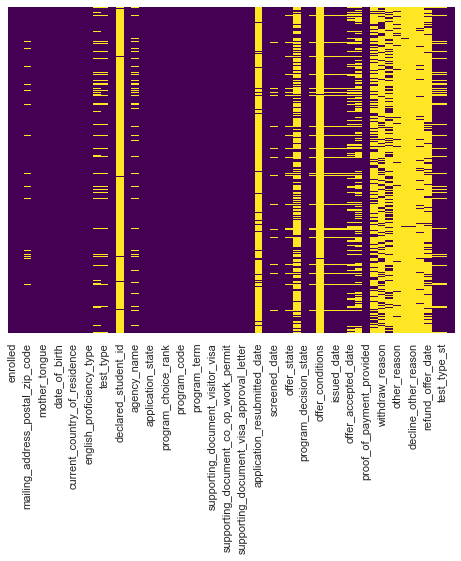

In [183]:
sns.heatmap(st.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [184]:
st['enrolled'] = st['enrolled'].astype(int)
st['proof_of_payment_provided'] = st['proof_of_payment_provided'].astype(int)

## Data profiling

### Numerical variables overview

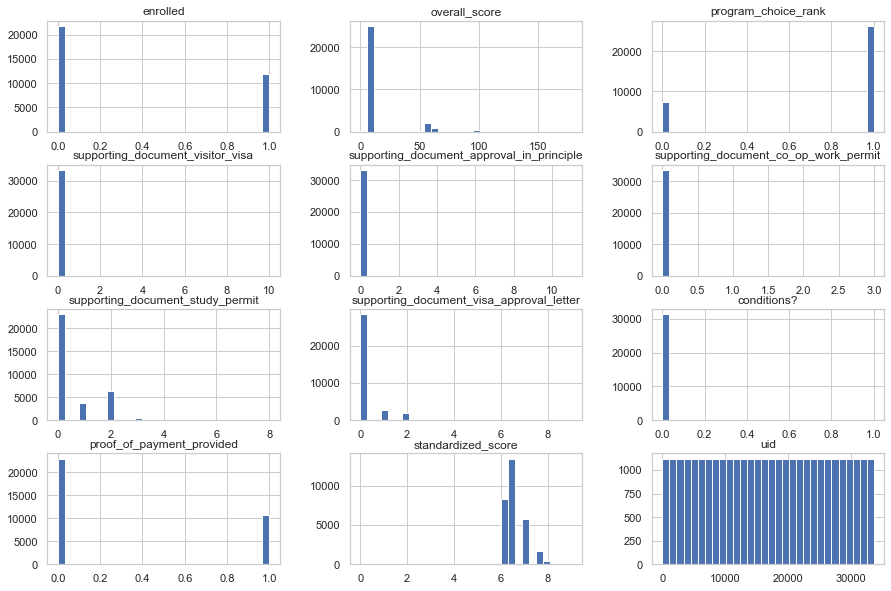

In [185]:
st.select_dtypes(include='number').hist(bins=30, figsize=(15, 10))
plt.show()

In [186]:
st.describe().T

,count,mean,std,min,25%,50%,75%,max
enrolled,33589.0,0.351841,0.477552,0.0,0.0,0.0,1.0,1.0
overall_score,29863.0,16.826809,25.810169,0.0,6.0,6.5,7.0,178.0
program_choice_rank,33589.0,0.782369,0.412641,0.0,1.0,1.0,1.0,1.0
supporting_document_visitor_visa,33589.0,0.011760,0.154750,0.0,0.0,0.0,0.0,10.0
supporting_document_approval_in_principle,33589.0,0.022239,0.208945,0.0,0.0,0.0,0.0,11.0
supporting_document_co_op_work_permit,33589.0,0.002977,0.063092,0.0,0.0,0.0,0.0,3.0
supporting_document_study_permit,33589.0,0.548334,0.880444,0.0,0.0,0.0,1.0,8.0
supporting_document_visa_approval_letter,33589.0,0.242311,0.637697,0.0,0.0,0.0,0.0,9.0
conditions?,31454.0,0.004228,0.064890,0.0,0.0,0.0,0.0,1.0
proof_of_payment_provided,33589.0,0.316026,0.464930,0.0,0.0,0.0,1.0,1.0


### Categorical variables overview

In [187]:
# Get columns with object dtype
object_columns = st.select_dtypes(include='object').columns
object_columns

Index(['applicant_number', 'mailing_address_postal_zip_code',
       'primary_citizenship', 'mother_tongue', 'country_of_birth',
       'status_in_canada', 'current_country_of_residence',
       'current_province_of_residence', 'english_proficiency_type',
       'test_type', 'applicant_type', 'declared_student_id', 'agency_name',
       'application_number', 'application_state', 'program_title',
       'program_code', 'campus_name', 'program_term', 'screening_status',
       'offer_state', 'program_decision_state', 'offer_conditions',
       'withdraw_reason', 'revoke_reason', 'other_reason', 'decline_reason',
       'decline_other_reason', 'test_type_st'],
      dtype='object')

In [188]:
object_columns = object_columns.drop(['applicant_number','declared_student_id','application_number','test_type_st'])

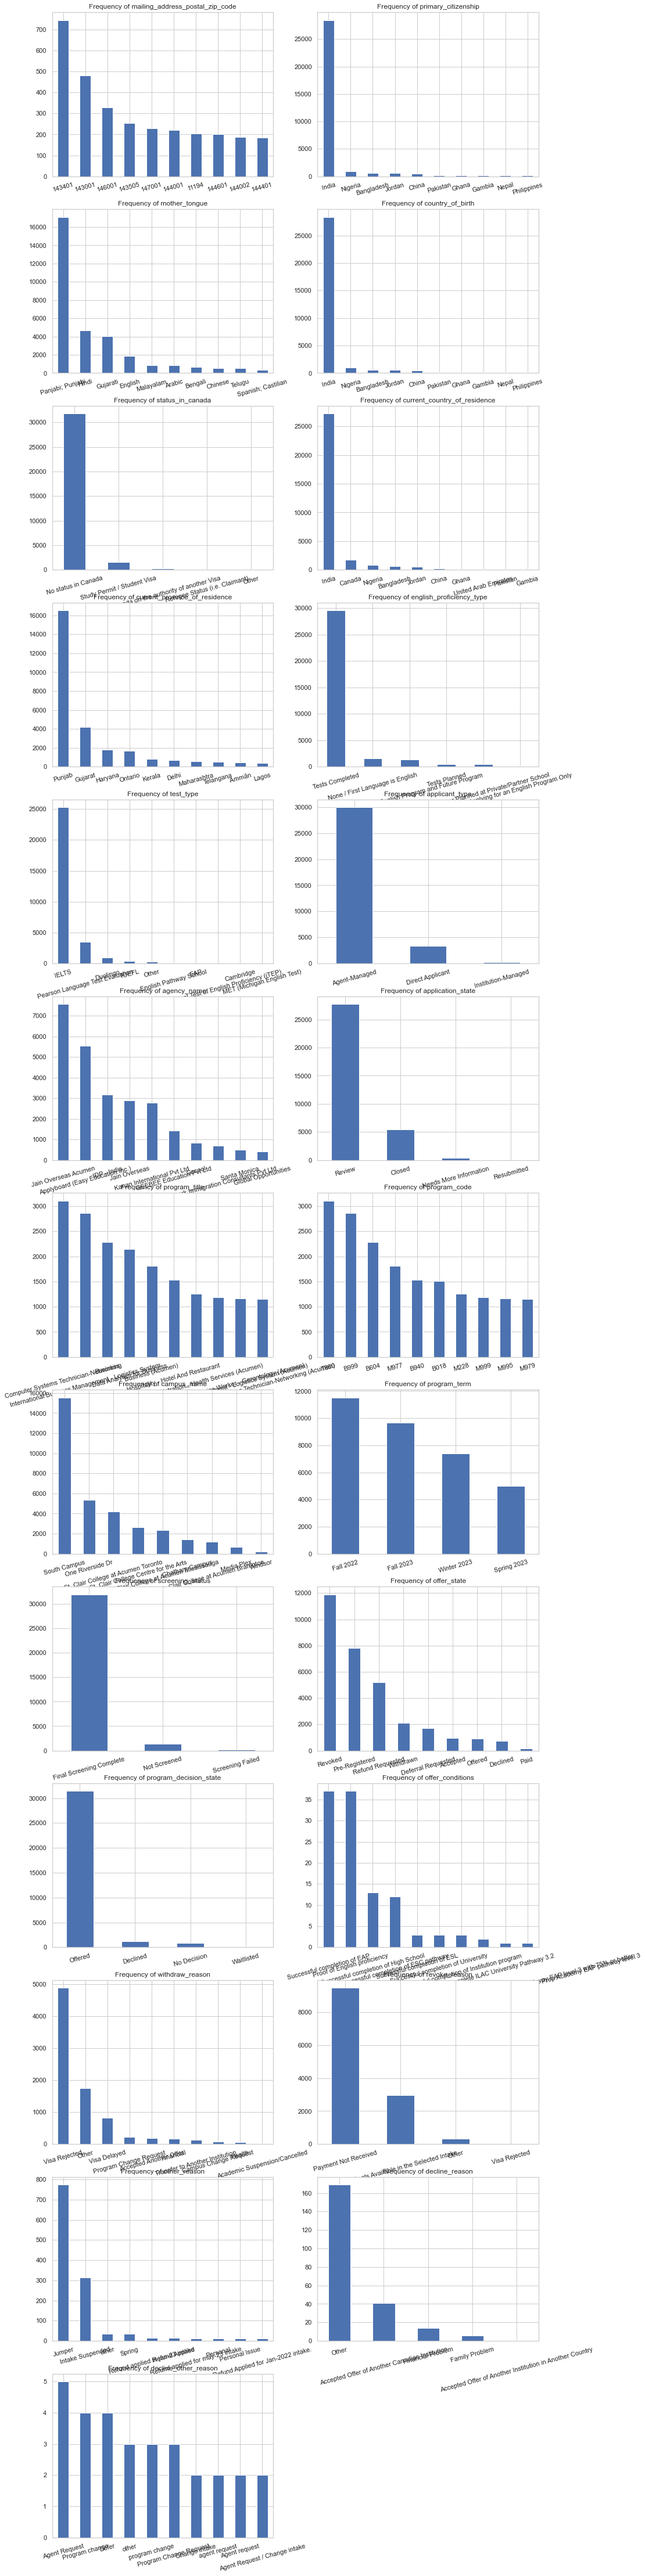

In [189]:
num_plots = len(object_columns)
plots_per_row = 2  # Set the number of plots per row
num_rows = -(-num_plots // plots_per_row)  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, plots_per_row, figsize=(15,80))

for i, col in enumerate(object_columns):
    row = i // plots_per_row  # Calculate row index
    col_index = i % plots_per_row  # Calculate column index

    st[col].value_counts().head(10).plot(kind='bar', ax=axes[row, col_index])
    axes[row, col_index].set_title(f'Frequency of {col}')
    axes[row, col_index].tick_params(axis='x', rotation=15)

# Hide any empty subplots
for i in range(num_plots, num_rows * plots_per_row):
    row = i // plots_per_row
    col_index = i % plots_per_row
    fig.delaxes(axes[row, col_index])

#plt.tight_layout()
plt.show()

In [190]:
st.describe(include=['O']).T

,count,unique,top,freq
applicant_number,33589,33589,X1981866,1
mailing_address_postal_zip_code,31926,6442,143401,746
primary_citizenship,33589,132,India,28457
mother_tongue,33589,85,Panjabi; Punjabi,17116
country_of_birth,33589,136,India,28401
status_in_canada,33589,5,No status in Canada,31772
current_country_of_residence,33589,133,India,27206
current_province_of_residence,33589,736,Punjab,16526
english_proficiency_type,33589,6,Tests Completed,29571
test_type,30610,12,IELTS,25285


## Univariate Analysis

### 1. Ratio of enrollments to applications

In [191]:
st.shape # the same as students_clean.xlsx

(33589, 58)

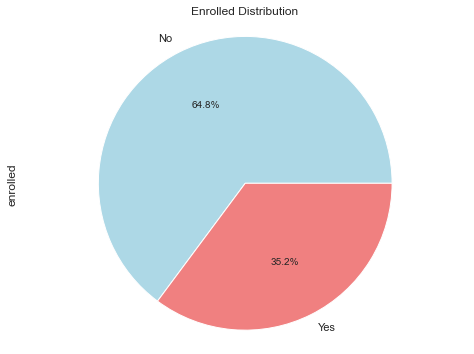

In [192]:
# Create a pie chart directly from the 'enrolled' column
st['enrolled'].value_counts().plot(kind='pie', 
                                     autopct='%1.1f%%', 
                                     colors=['lightblue', 'lightcoral'],
                                     labels=['No', 'Yes']
                                     )
# Add a title
plt.title('Enrolled Distribution')
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
# Show the chart
plt.show()

### 2. zip code

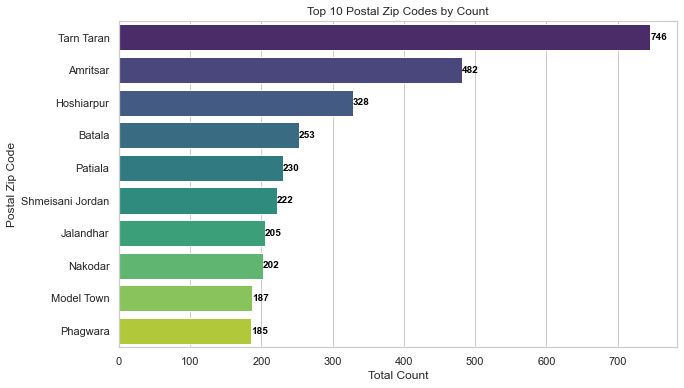

In [193]:
data = st.groupby(['mailing_address_postal_zip_code']).size()
# Get the top 10 values
top_10_data = data.nlargest(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=top_10_data.values, y=top_10_data.index, palette="viridis")

# Add text annotations on each bar
for index, value in enumerate(top_10_data.values):
    bar_plot.text(value, index, str(value), ha='left', va='center', color='black', fontweight='bold')

# Set labels and title
plt.xlabel('Total Count')
plt.ylabel('Postal Zip Code')
plt.title('Top 10 Postal Zip Codes by Count')
plt.yticks(range(len(top_10_data)), ['Tarn Taran','Amritsar','Hoshiarpur','Batala','Patiala','Shmeisani Jordan',
                                     'Jalandhar','Nakodar','Model Town','Phagwara'])
plt.show()

| Zip Code | Place Name |
|-------|------|
|143401|Tarn Taran|
|143001|Amritsar|
|146001|Hoshiarpur|
|143505|Batala|
|147001|Patiala|
|11194|Shmeisani,Jordan|
|144001|Jalandhar|
|144601|Nakodar|
|144002|Model Town|
|144401|Phagwara|

### 3.Percentage of primary citizenship

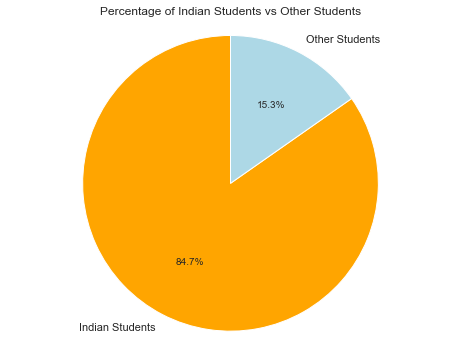

In [194]:
# Count the occurrences of each citizenship
citizenship_counts = st['primary_citizenship'].value_counts()

# Plotting a pie chart
labels = ['Indian Students', 'Other Students']
sizes = [citizenship_counts.get('India', 0), citizenship_counts.sum() - citizenship_counts.get('India', 0)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Indian Students vs Other Students')
plt.show()

### 4.Mother tongue

In [195]:
st['mother_tongue'] = st['mother_tongue'].replace(
                                                  {'Panjabi; Punjabi':'Punjabi',
                                                   'Spanish; Castilian':'Spanish',
                                                   'Sinhala; Sinhalese':'Sinhala',
                                                   'Pushto; Pashto':'Pushto',
                                                   'Dutch; Flemish':'Dutch',
                                                   'Haitian; Haitian Creole':'Haitian',
                                                    'Kikuyu; Gikuyu':'Kikuyu',
                                                    'Kirghiz; Kyrgyz':'Kirghiz',
                                                    'Sinhala; Sinhalese':'Sinhala',
                                                    'Romanian; Moldavian; Moldovan':'Romanian'}
                                                 )

In [196]:
tongue_counts = st.groupby('mother_tongue').size().nlargest(10)
tongue_counts

mother_tongue
Punjabi      17116
Hindi         4692
Gujarati      4043
English       1874
Malayalam      872
Arabic         860
Bengali        658
Chinese        556
Telugu         539
Spanish        362
dtype: int64

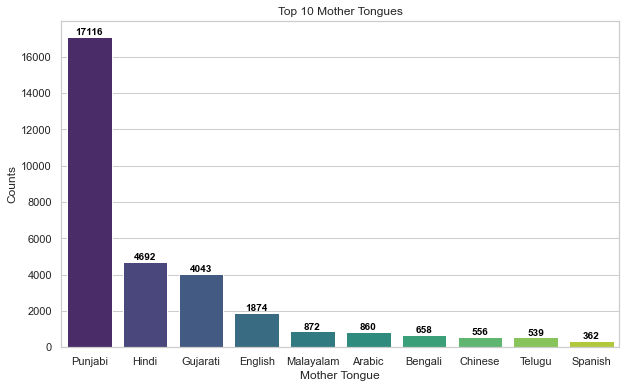

In [197]:
# Create a bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=tongue_counts.index, y=tongue_counts.values, palette="viridis")

# Add text annotations on each bar
for index, value in enumerate(tongue_counts.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', color='black', fontweight='bold')

# Set labels and title
plt.xlabel('Mother Tongue')
plt.ylabel('Counts')
plt.title('Top 10 Mother Tongues')

# Show the plot
plt.show()

### 5.Country of birth except for India

In [198]:
st_1=st[st['country_of_birth']!='India']
top_country = st_1['primary_citizenship'].value_counts().nlargest(10)

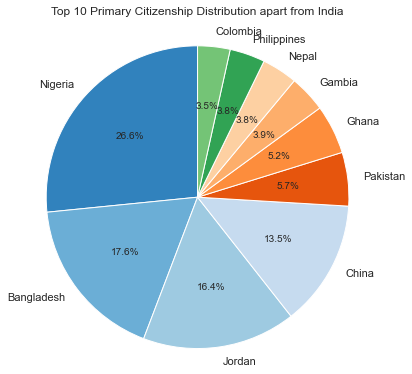

In [199]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(top_country, labels=top_country.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20c.colors)

# Add a title
plt.title('Top 10 Primary Citizenship Distribution apart from India', pad=20)  # Adjust the 'pad' parameter

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the chart with legend outside the pie chart
#plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")

# Show the chart
plt.show()

### 6.Date of birth

In [200]:
st['year_of_birth'] = st.date_of_birth.dt.year

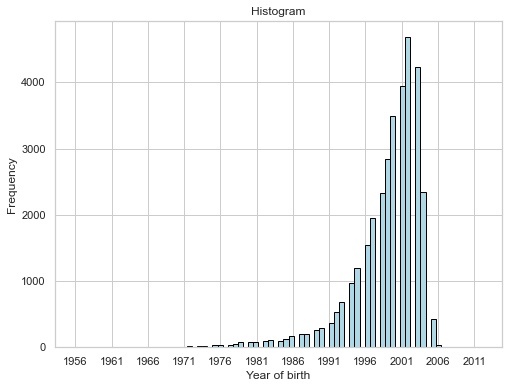

In [201]:
data = st.year_of_birth
plt.hist(data, bins=80, color='lightblue', edgecolor='black')
plt.xlabel('Year of birth')
plt.ylabel('Frequency')
plt.title('Histogram')
# Set specific x-axis tick locations
ticks = np.arange(min(data), max(data) + 1, 5)  # Adjust the step size as needed
plt.xticks(ticks)
plt.show()

### 6.1 Age distribution

In [202]:
from datetime import datetime
current_date = datetime.now()
st['age'] = (current_date - st['date_of_birth']).astype('<m8[Y]')

upper_limit :  38.73966671340443
lower_limit :  9.29522566207564
Mean Value :  24.017446187740035
Median Value :  23.0
1st Standard Deviation :  4.907406841888132


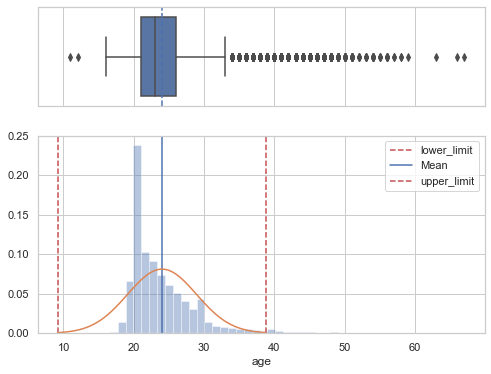

In [203]:
from scipy.stats import norm
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.5, 1)})
median=st.age.median()
mean=st.age.mean()
std = st.age.std()
upper_limit = mean + std*3
lower_limit = mean - std*3
print("upper_limit : ", upper_limit)
print("lower_limit : ",lower_limit)
sns.boxplot(st["age"], ax=ax_box)
ax_box.axvline(mean, color='b', linestyle='--')
sns.distplot(st["age"], ax=ax_hist,kde=False,norm_hist=True)
ax_hist.axvline(lower_limit, color='r', linestyle='--')
ax_hist.axvline(mean, color='b', linestyle='-')
ax_hist.axvline(upper_limit, color='r', linestyle='--')
plt.legend({'Mean':mean})
ax_box.set(xlabel='')
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x, norm.pdf(x, mean, std))
plt.legend({"lower_limit":lower_limit,'Mean':mean,'upper_limit':upper_limit})
print("Mean Value : ",mean)
print("Median Value : ",median)
print("1st Standard Deviation : ",std)
plt.show()


### 7.Status in canada

In [204]:
sta = pd.DataFrame(st.status_in_canada.value_counts().reset_index())
sta

,index,status_in_canada
0,No status in Canada,31772
1,Study Permit / Student Visa,1584
2,In Canada on the authority of another Visa,217
3,Refugee Status (i.e. Claimant),13
4,Other,3


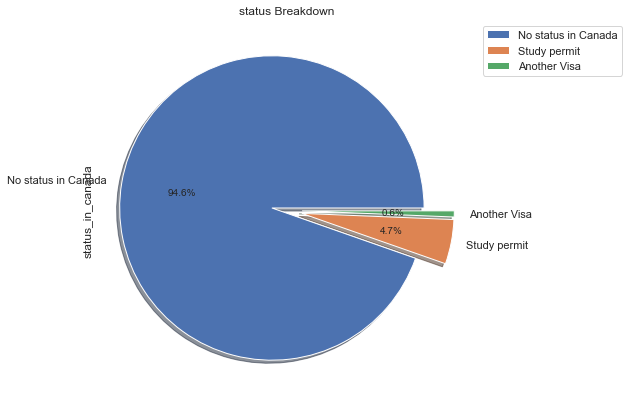

In [205]:
status_num = sta['status_in_canada'].head(3)
labels = ['No status in Canada','Study permit','Another Visa']
status_num_chart = status_num.plot(kind='pie', 
                                   title='status Breakdown', 
                                   labels=labels,
                                   figsize = (7,7), 
                                   explode = (0.1,0.1,0.1), 
                                   shadow = True, 
                                   autopct = '%1.1f%%')
status_num_chart.legend(bbox_to_anchor = (1, 1))

### 8.Top 10 Current country of residence except for India

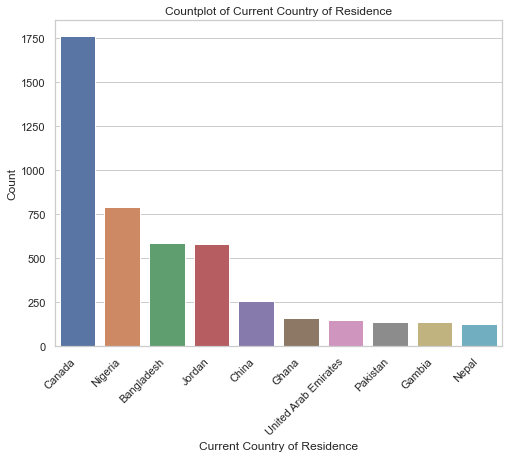

In [206]:
order = st['current_country_of_residence'].value_counts(ascending=False).head(11).tail(10).index

sns.countplot(x='current_country_of_residence', data=st, order=order)
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and horizontal alignment

# Set labels and title
plt.xlabel('Current Country of Residence')
plt.ylabel('Count')
plt.title('Countplot of Current Country of Residence')

# Show the plot
plt.show()

### 9. Top 20 Current province of residence in India

In [207]:
order = st[st['current_country_of_residence']=='India']['current_province_of_residence'].value_counts().head(20).index

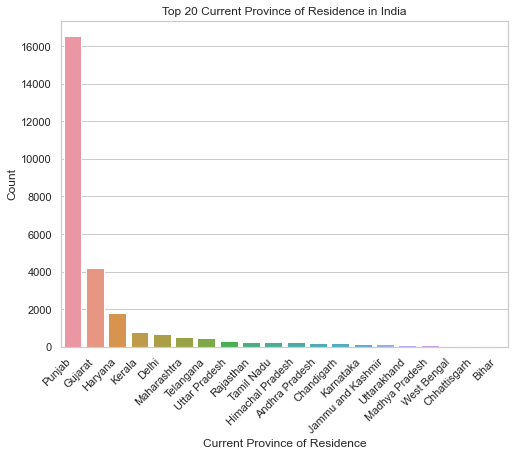

In [208]:
sns.countplot(x='current_province_of_residence', data=st, order=order)
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and horizontal alignment

# Set labels and title
plt.xlabel('Current Province of Residence')
plt.ylabel('Count')
plt.title('Top 20 Current Province of Residence in India')

# Show the plot
plt.show()

In [209]:
order = st[(st['current_country_of_residence']!='India')&(st['current_country_of_residence']!='Pakistan')]['current_province_of_residence'].value_counts().head(20).index

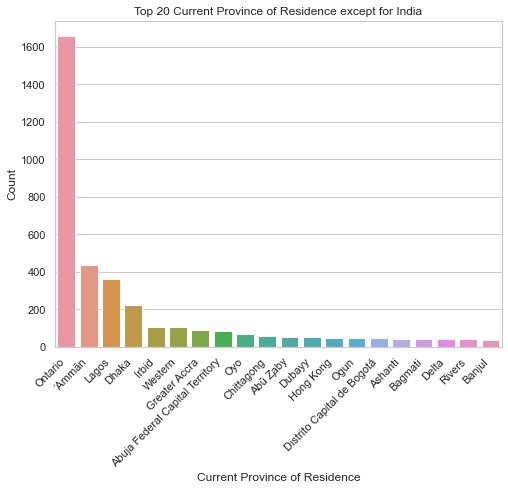

In [210]:
sns.countplot(x='current_province_of_residence', data=st, order=order)
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and horizontal alignment

# Set labels and title
plt.xlabel('Current Province of Residence')
plt.ylabel('Count')
plt.title('Top 20 Current Province of Residence except for India')

# Show the plot
plt.show()

### 10.English proficiency type

In [211]:
eng = st.english_proficiency_type.value_counts().sort_values(ascending=True)
eng

Applying for an English Program Only                    135
Completed or Planned at Private/Partner School          440
Tests Planned                                           480
Applying for an English Program and Future Program     1391
None / First Language is English                       1572
Tests Completed                                       29571
Name: english_proficiency_type, dtype: int64

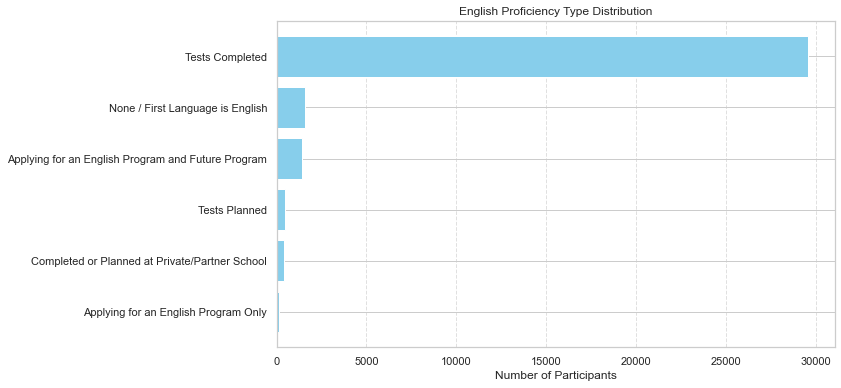

In [212]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(eng.index, eng.values, color='skyblue')
plt.xlabel('Number of Participants')
plt.title('English Proficiency Type Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### 11.Overall score -- standardized_score   English test grades distribution

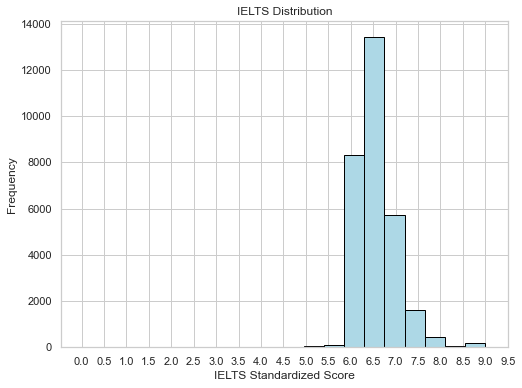

In [213]:
data = st.standardized_score
plt.hist(data, bins=20, color='lightblue', edgecolor='black')

# Set specific x-axis tick locations
ticks = np.arange(min(data), max(data) + 1, 0.5)  # Adjust the step size as needed
plt.xticks(ticks)
plt.xlabel('IELTS Standardized Score')
plt.ylabel('Frequency')
plt.title('IELTS Distribution')
plt.show()

<AxesSubplot:ylabel='standardized_score'>

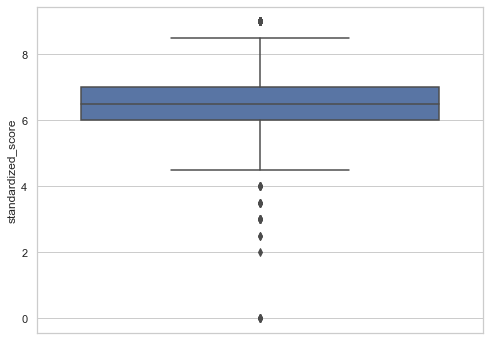

In [214]:
sns.boxplot(data = st, y= 'standardized_score')

### 12.English test type

In [215]:
data=st.test_type.value_counts().sort_values(ascending=True)

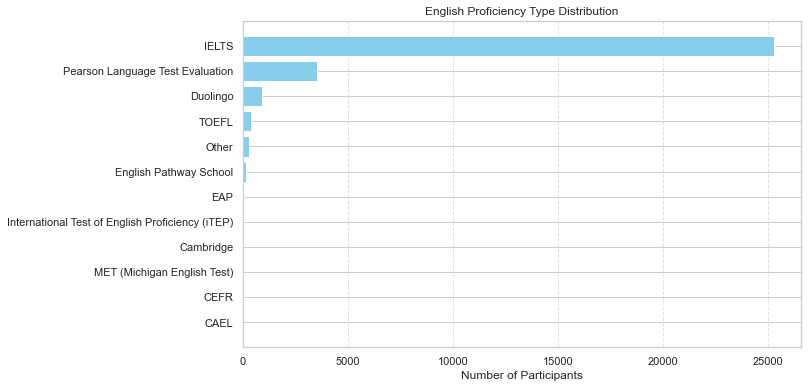

In [216]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(data.index, data.values, color='skyblue')
plt.xlabel('Number of Participants')
plt.title('English Proficiency Type Distribution')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### 12.Applicant type

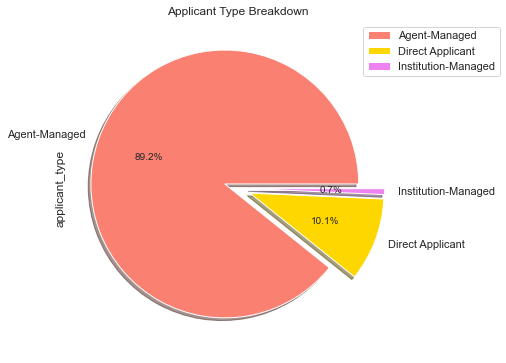

In [217]:
app_type_num = st['applicant_type'].value_counts()
app_type_num_chart = app_type_num.plot(kind='pie', 
                       title='Applicant Type Breakdown', 
                       figsize = (6,7), 
                       explode = (0.1, 0.1 ,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold","violet"])

app_type_num_chart.legend(bbox_to_anchor = (1.3, 1))

### 13.Agency name

<AxesSubplot:title={'center':'Top 20 Agencies'}>

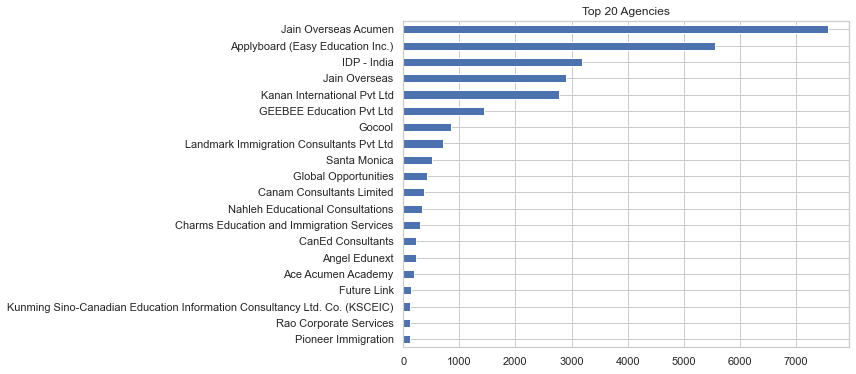

In [218]:
st.agency_name.value_counts().head(20).sort_values(ascending=True).plot(kind='barh',title='Top 20 Agencies')

In [219]:
st.agency_name.nunique()

233

In [220]:
order = st[st['current_country_of_residence']=='India']['agency_name'].value_counts().head(20).index

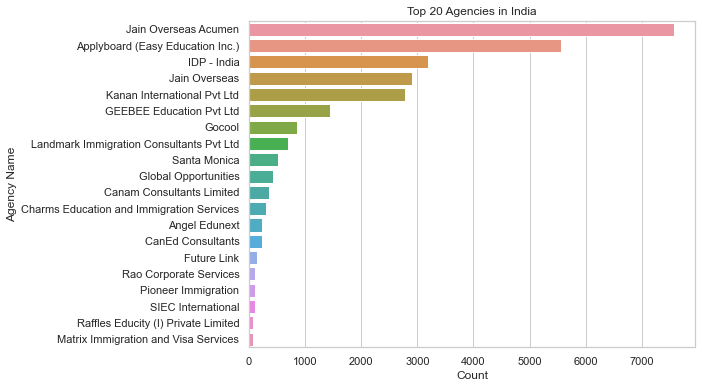

In [221]:
sns.countplot(y='agency_name', data=st, order=order)
#plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and horizontal alignment

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Agency Name')
plt.title('Top 20 Agencies in India')

# Show the plot
plt.show()

In [222]:
names_in_india = st[st['current_country_of_residence']=='India']['agency_name'].unique()

In [223]:
# Filter out rows where 'current_country_of_residence' is not 'India'
names_outside_india = st[st['current_country_of_residence'] != 'India']

# Exclude agencies in India
names_outside_india = names_outside_india[~names_outside_india['agency_name'].isin(names_in_india)]

# Calculate counts of each agency
agency_counts_outside_india = names_outside_india['agency_name'].value_counts()

# Display the counts
print(agency_counts_outside_india)


Nahleh Educational Consultations                                             332
Kunming Sino-Canadian Education Information Consultancy Ltd. Co. (KSCEIC)    126
Cham's Consultancy                                                            98
Study Concerns International                                                  46
ICAN Education                                                                26
                                                                            ... 
Masterclass                                                                    1
GoBest Immigration Services                                                    1
Lime Education                                                                 1
Golden Path for University Services                                            1
Edu Global Pro                                                                 1
Name: agency_name, Length: 176, dtype: int64


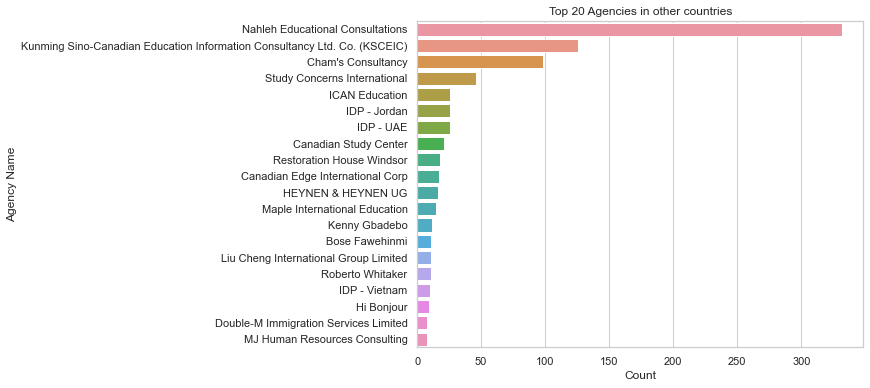

In [224]:
order = agency_counts_outside_india.head(20).index
sns.countplot(y='agency_name', data=st, order=order)
#plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and horizontal alignment

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Agency Name')
plt.title('Top 20 Agencies in other countries')

# Show the plot
plt.show()

### 13.Application state

In [225]:
st.application_state.value_counts()

Review                    27735
Closed                     5461
Needs More Information      371
Resubmitted                  22
Name: application_state, dtype: int64

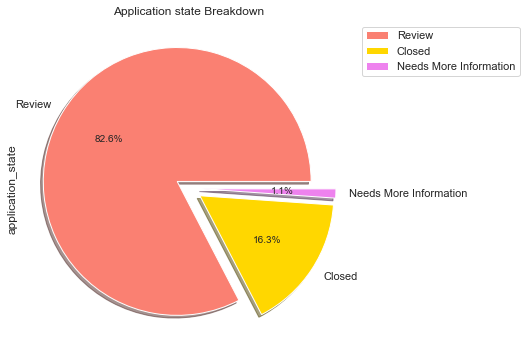

In [226]:
app_state_num = st['application_state'].value_counts().head(3)
app_state_num_chart = app_state_num.plot(kind='pie', 
                       title='Application state Breakdown', 
                       figsize = (6,7), 
                       explode = (0.1, 0.1,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold","violet","teal"])

app_state_num_chart.legend(bbox_to_anchor = (1, 1))

### 14.Program choice rank

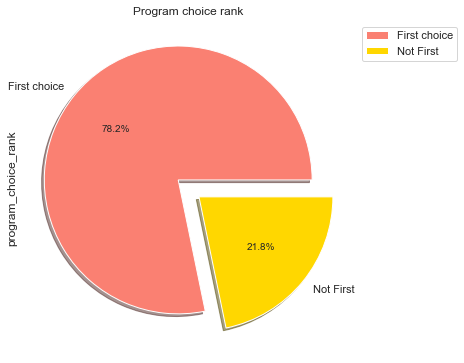

In [227]:
choice = st.program_choice_rank.value_counts()
choice_chart = choice.plot(kind='pie', 
                       title='Program choice rank', 
                       labels = ['First choice','Not First'],
                       figsize = (6,7), 
                       explode = (0.1, 0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold","violet","teal"])

choice_chart.legend(bbox_to_anchor = (1, 1))

### 15.Program title

<AxesSubplot:title={'center':'Top 20 Programs'}>

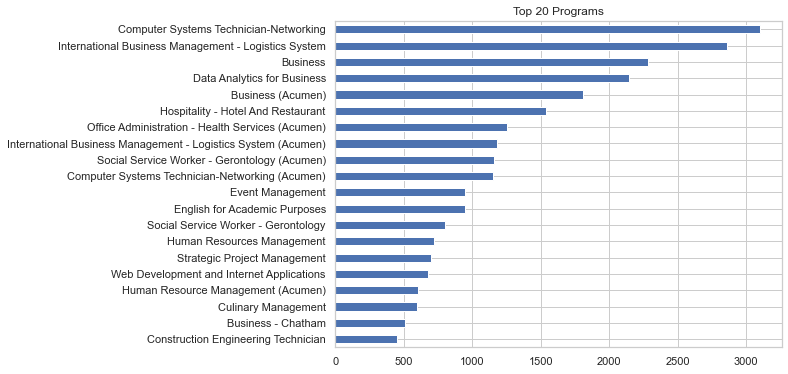

In [228]:
st.program_title.value_counts().head(20).sort_values(ascending=True).plot(kind='barh',title='Top 20 Programs')

### 15.Program code

<AxesSubplot:title={'center':'Top 20 Program code'}>

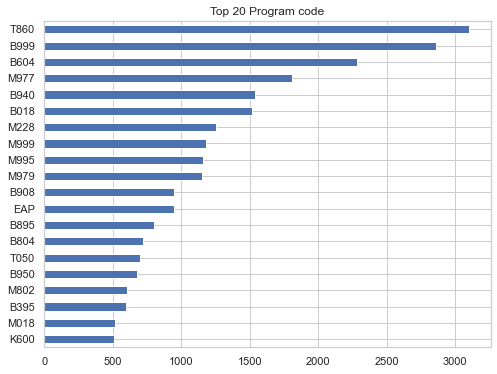

In [229]:
st.program_code.value_counts().head(20).sort_values(ascending=True).plot(kind='barh',title='Top 20 Program code')

### 15.Campus name

In [230]:
st['campus_name'] = st['campus_name'].replace(
                                                  {'One Riverside Dr':'Downtown campus',
                                                   'Media Plex':'Downtown campus',
                                                   'Windsor':'South Campus',
                                                    'St. Clair College Centre for the Arts':'Downtown campus',
                                                    'St. Clair College at Acumen Toronto':'Acumen Toronto campus',
                                                    'St. Clair College at Acumen Mississauga':'Acumen Mississauga campus',
                                                    'St. Clair College at Acumen Brampton':'Acumen Brampton campus'}
                                                   )

In [231]:
st.campus_name.value_counts()

South Campus                 15742
Downtown campus               8640
Acumen Toronto campus         4229
Acumen Mississauga campus     2337
Chatham Campus                1419
Acumen Brampton campus        1222
Name: campus_name, dtype: int64

<AxesSubplot:title={'center':'Campus distribution'}>

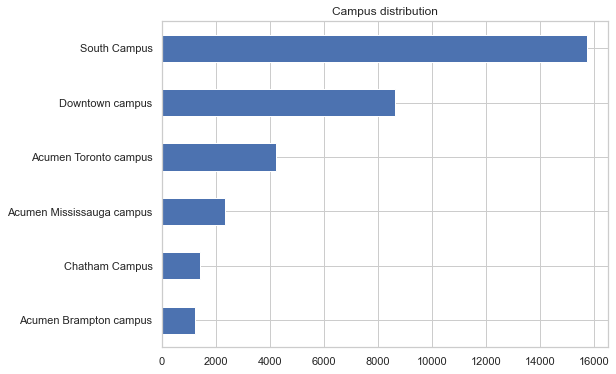

In [232]:
st.campus_name.value_counts().sort_values(ascending=True).plot(kind='barh',title='Campus distribution')

### 15.Program term

<AxesSubplot:title={'center':'Duration from Fall 2022 to Sping 2023'}>

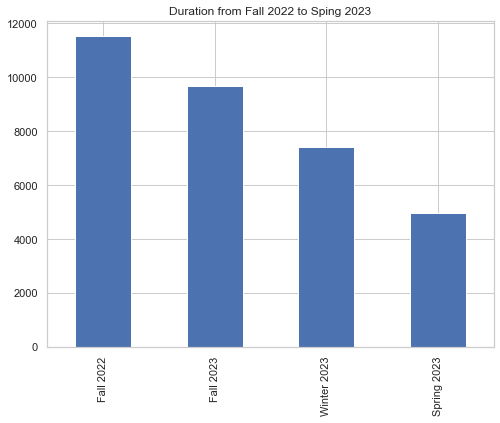

In [233]:
st.program_term.value_counts().plot(kind='bar',title='Duration from Fall 2022 to Sping 2023')

### 16.Program start date

In [234]:
st['program_start_date'] = st['program_start_date'].replace(
                                                  {'2023-09-05':'2023-09-06',
                                                   '2022-09-03':'2022-09-06',
                                                   '2023-09-04':'2023-09-06',
                                                   '2022-10-31':'2022-09-06',
                                                   '2022-10-03':'2022-09-06',
                                                   '2023-10-30':'2023-09-06',
                                                   '2023-02-21':'2023-01-09',
                                                   '2023-02-25':'2023-01-09'
                                                  }
                                                   )

In [235]:
st.program_start_date.value_counts()

2022-09-06    11518
2023-09-06     9685
2023-01-09     7407
2023-05-08     4979
Name: program_start_date, dtype: int64

<AxesSubplot:title={'center':'Program start date'}>

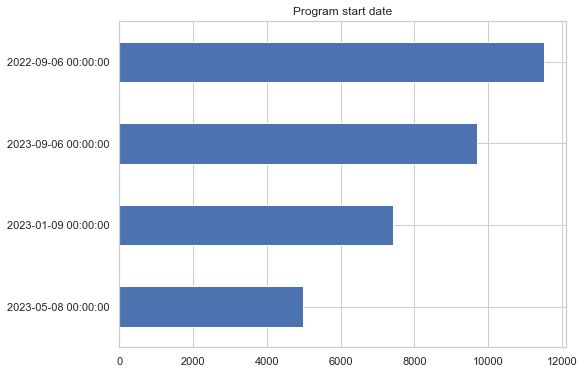

In [236]:
st.program_start_date.value_counts().sort_values(ascending=True).plot(kind='barh',title='Program start date')

### 17.Supporting document

In [237]:
st.supporting_document_visitor_visa.value_counts()

0     33308
1       209
2        52
3        11
5         5
4         2
10        1
6         1
Name: supporting_document_visitor_visa, dtype: int64

In [238]:
st.supporting_document_approval_in_principle.value_counts()

0     33075
1       359
2        99
3        46
4         6
6         2
5         1
11        1
Name: supporting_document_approval_in_principle, dtype: int64

In [239]:
st.supporting_document_co_op_work_permit.value_counts()

0    33503
1       75
2        8
3        3
Name: supporting_document_co_op_work_permit, dtype: int64

In [240]:
st.supporting_document_study_permit.value_counts()

0    22954
2     6269
1     3694
3      550
4       87
5       24
6       10
8        1
Name: supporting_document_study_permit, dtype: int64

In [241]:
st.supporting_document_visa_approval_letter.value_counts()

0    28427
1     2783
2     1888
3      418
4       56
5        9
7        4
6        2
9        1
8        1
Name: supporting_document_visa_approval_letter, dtype: int64

### 19.Application submitted date

In [242]:
#! pip install empiricaldist

In [243]:
from empiricaldist import Pmf
from empiricaldist import Cdf

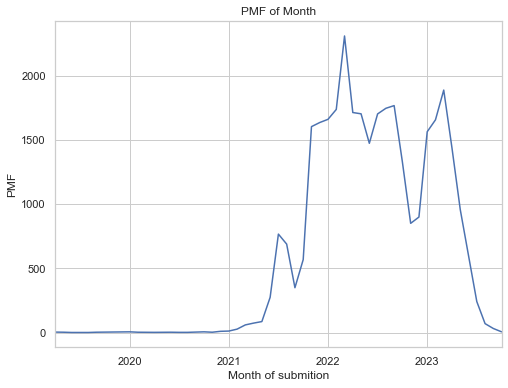

In [244]:
pmf_year_num = Pmf.from_seq(st['application_submitted_date'].dt.to_period('M'), normalize=False)
pmf_year_num.plot()
plt.xlabel('Month of submition')
plt.ylabel('PMF')
plt.title('PMF of Month')
plt.show()

### 20.screening_status

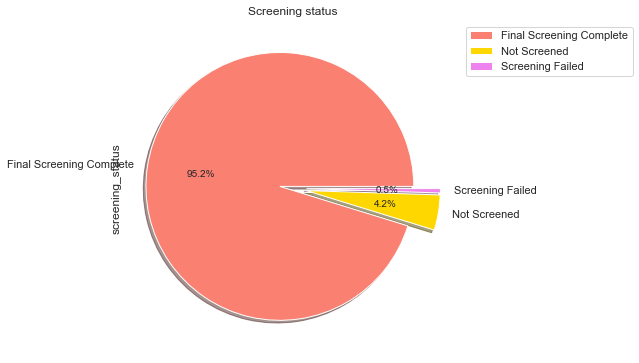

In [245]:
screen = st.screening_status.value_counts()
screen_chart = screen.plot(kind='pie', 
                       title='Screening status', 
                       figsize = (6,7), 
                       explode = (0.1, 0.1,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold","violet","teal"])

screen_chart.legend(bbox_to_anchor = (1, 1))

### 21.Screened date

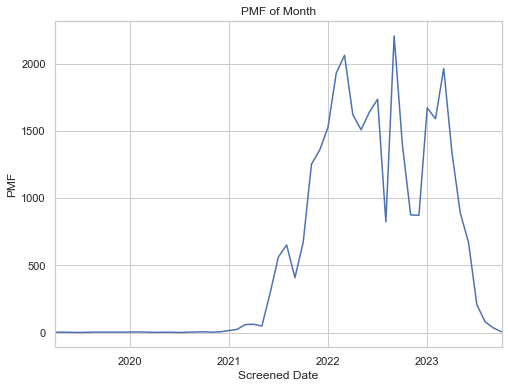

In [246]:
pmf_year_num = Pmf.from_seq(st['screened_date'].dt.to_period('M'), normalize=False)
pmf_year_num.plot()
plt.xlabel('Screened Date')
plt.ylabel('PMF')
plt.title('PMF of Month')
plt.show()

### 22.Application last modified date

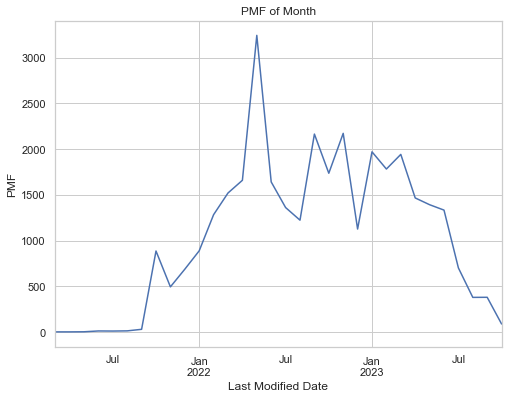

In [247]:
pmf_year_num = Pmf.from_seq(st['application_last_modified_date'].dt.to_period('M'), normalize=False)
pmf_year_num.plot()
plt.xlabel('Last Modified Date')
plt.ylabel('PMF')
plt.title('PMF of Month')
plt.show()

### 23.Offer state

<AxesSubplot:>

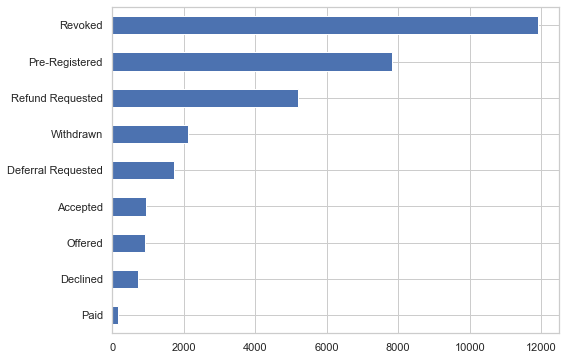

In [248]:
st.offer_state.value_counts().sort_values(ascending=True).plot(kind='barh')

###### proof_of_payment_date

In [249]:
st.proof_of_payment_date.count()

10615

### 24.program_decision_state

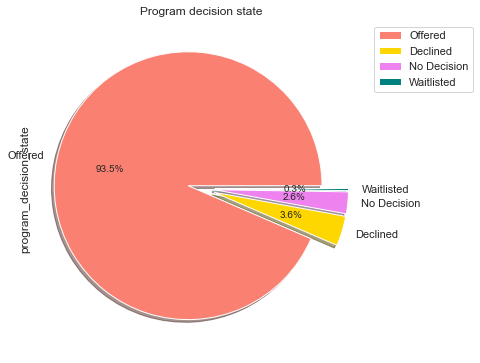

In [250]:
program_de = st.program_decision_state.value_counts()
screen_chart = program_de.plot(kind='pie', 
                       title='Program decision state', 
                       figsize = (6,7), 
                       explode = (0.1, 0.1,0.1,0.1), 
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold","violet","teal"])

screen_chart.legend(bbox_to_anchor = (1, 1))

### 25.conditions?
When program_decision_state is declined or no desicion, the conditions? is nan.

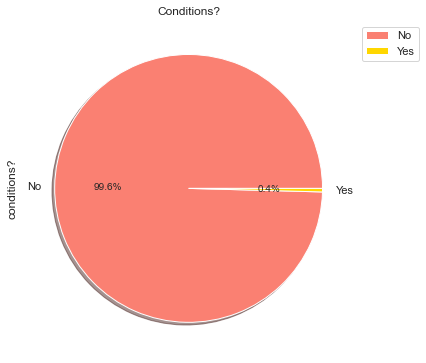

In [251]:
conditions = st['conditions?'].value_counts()
screen_chart = conditions.plot(kind='pie', 
                       title='Conditions?', 
                       figsize = (6,7), 
                       #explode = (0.1, 0.1), 
                       labels = ['No','Yes'],
                       shadow = True, 
                       autopct = '%1.1f%%',
                       colors=["salmon","gold"])

screen_chart.legend(bbox_to_anchor = (1, 1))

### 26.offer_conditions

In [252]:
st.offer_conditions.count()

133

<AxesSubplot:>

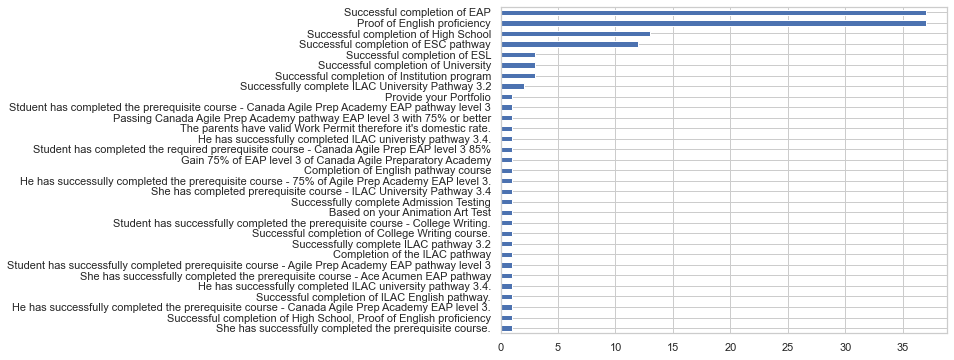

In [253]:
st.offer_conditions.value_counts().sort_values(ascending=True).plot(kind='barh')

### 27.offer_date, issued_date, expiration_date
When program_decision_state is declined or no desicion, the offer_date, issued_date, expiration_date is nan.

In [254]:
st[['offer_date','issued_date','expiration_date','offer_accepted_date','paid_date']].count()

offer_date             31454
issued_date            31454
expiration_date        31454
offer_accepted_date    26088
paid_date              17808
dtype: int64

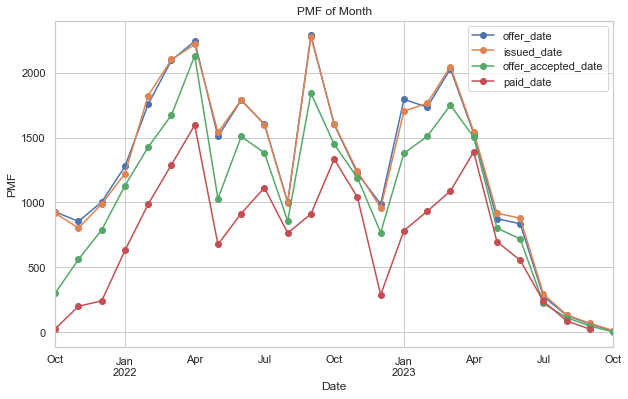

In [255]:
#from thinkstats2 import Pmf

# Create PMFs for both columns
pmf_1 = Pmf.from_seq(st['offer_date'].dt.to_period('M'), normalize=False)
pmf_2 = Pmf.from_seq(st['issued_date'].dt.to_period('M'), normalize=False)
#pmf_3 = Pmf.from_seq(st_1['expiration_date'].dt.to_period('M'), normalize=False)
pmf_4 = Pmf.from_seq(st['offer_accepted_date'].dt.to_period('M'), normalize=False)
pmf_5 = Pmf.from_seq(st['paid_date'].dt.to_period('M'), normalize=False)
# Plotting the PMFs
plt.figure(figsize=(10, 6))

# Plot lines for both columns
pmf_1.plot(label='offer_date', marker='o')
pmf_2.plot(label='issued_date', marker='o')
#pmf_3.plot(label='expiration_date', marker='o')
pmf_4.plot(label='offer_accepted_date', marker='o')
pmf_5.plot(label='paid_date', marker='o')
# Customize the plot
plt.xlabel('Date')
plt.ylabel('PMF')
plt.title('PMF of Month')
plt.legend()
plt.grid(True)
plt.show()



### 28.proof_of_payment_provided

In [256]:
st.proof_of_payment_provided.value_counts()

0    22974
1    10615
Name: proof_of_payment_provided, dtype: int64

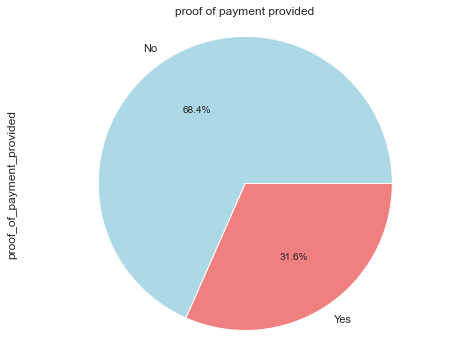

In [257]:
# Create a pie chart directly from the 'enrolled' column
labels = ['No', 'Yes']
st['proof_of_payment_provided'].value_counts().plot(kind='pie', 
                                     autopct='%1.1f%%', 
                                     colors=['lightblue', 'lightcoral'],
                                     labels=labels
                                     )

# Add a title
plt.title('proof of payment provided')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the chart
plt.show()

### 29.pre-registration_date

In [258]:
st['pre-registration_date'].count()

9099

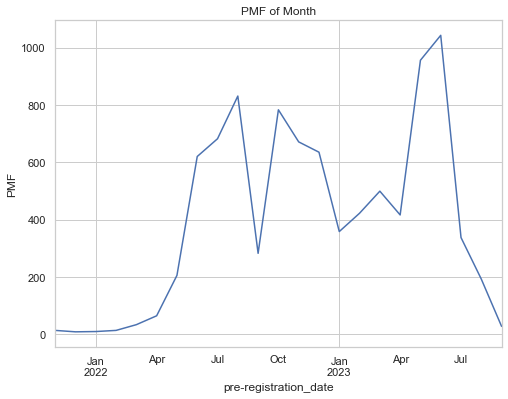

In [259]:
pmf_year_num = Pmf.from_seq(st['pre-registration_date'].dt.to_period('M'), normalize=False)
pmf_year_num.plot()
plt.xlabel('pre-registration_date')
plt.ylabel('PMF')
plt.title('PMF of Month')
plt.show()

### 30.withdraw_reason

In [260]:
st.withdraw_reason.count()

8334

In [261]:
st.withdraw_reason.nunique()

12

<AxesSubplot:>

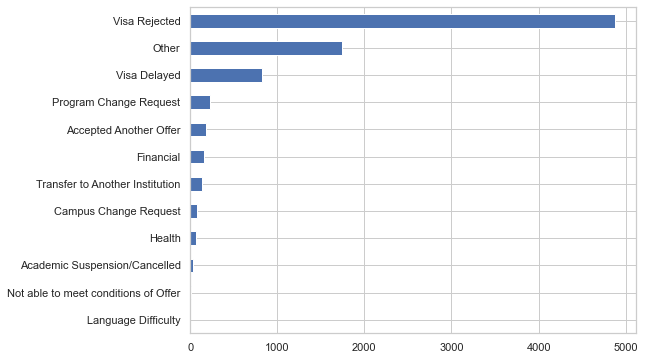

In [262]:
st.withdraw_reason.value_counts().sort_values(ascending=True).plot(kind='barh')

### 31.revoke_reason

In [263]:
st.revoke_reason.count()

12746

In [264]:
st.revoke_reason.nunique()

4

<AxesSubplot:>

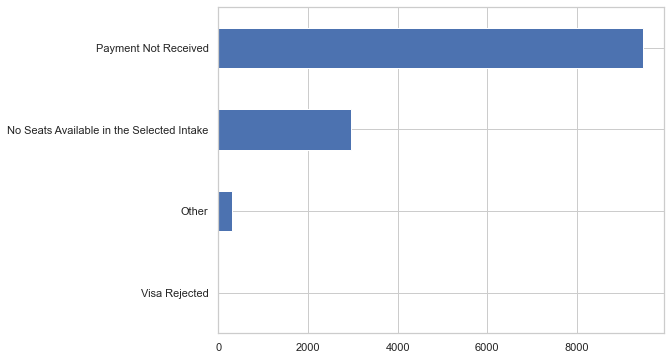

In [265]:
st.revoke_reason.value_counts().sort_values(ascending=True).plot(kind='barh')

###### other_reason

In [266]:
st.other_reason.count()

2038

In [267]:
st.other_reason.nunique()

600

### 32.decline_reason

In [268]:
st.decline_reason.count()

231

In [269]:
st.decline_reason.nunique()

5

<AxesSubplot:>

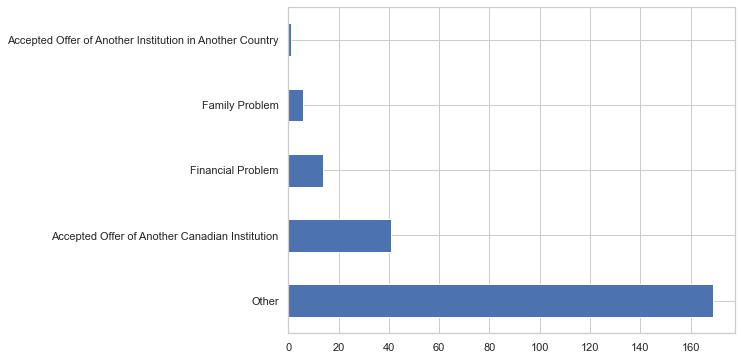

In [270]:
st.decline_reason.value_counts().plot(kind='barh')

###### decline_other_reason

In [271]:
st.decline_other_reason.count()

169

In [272]:
st.decline_other_reason.nunique()

144

###### deferral_offer_date

In [273]:
st.deferral_offer_date.count()

1888

###### refund_offer_date

In [274]:
st.refund_offer_date.count()

5365

## Bivariate Analysis

In [275]:
# Display the correlation matrix
correlation_matrix = st.corr().round(2)
correlation_matrix

,enrolled,overall_score,program_choice_rank,supporting_document_visitor_visa,supporting_document_approval_in_principle,supporting_document_co_op_work_permit,supporting_document_study_permit,supporting_document_visa_approval_letter,conditions?,proof_of_payment_provided,standardized_score,uid,year_of_birth,age
enrolled,1.00,-0.13,-0.11,0.05,0.07,0.02,0.63,0.34,-0.00,0.35,-0.03,-0.01,0.10,-0.10
overall_score,-0.13,1.00,0.05,0.06,-0.02,0.03,-0.14,-0.04,0.06,0.01,0.30,-0.04,-0.12,0.12
program_choice_rank,-0.11,0.05,1.00,0.01,0.02,-0.00,-0.06,0.05,0.02,0.23,0.09,0.04,0.01,-0.01
supporting_document_visitor_visa,0.05,0.06,0.01,1.00,0.01,0.05,-0.03,0.01,0.09,0.01,0.01,0.00,-0.12,0.12
supporting_document_approval_in_principle,0.07,-0.02,0.02,0.01,1.00,0.02,-0.01,0.08,-0.00,0.02,0.03,-0.01,-0.00,0.00
supporting_document_co_op_work_permit,0.02,0.03,-0.00,0.05,0.02,1.00,0.02,0.02,-0.00,0.00,0.01,0.00,-0.04,0.04
supporting_document_study_permit,0.63,-0.14,-0.06,-0.03,-0.01,0.02,1.00,0.01,-0.02,0.28,-0.01,-0.01,0.14,-0.14
supporting_document_visa_approval_letter,0.34,-0.04,0.05,0.01,0.08,0.02,0.01,1.00,-0.01,0.18,0.01,-0.04,0.02,-0.02
conditions?,-0.00,0.06,0.02,0.09,-0.00,-0.00,-0.02,-0.01,1.00,-0.01,-0.01,-0.01,-0.09,0.09
proof_of_payment_provided,0.35,0.01,0.23,0.01,0.02,0.00,0.28,0.18,-0.01,1.00,0.01,-0.03,0.09,-0.09


<AxesSubplot:>

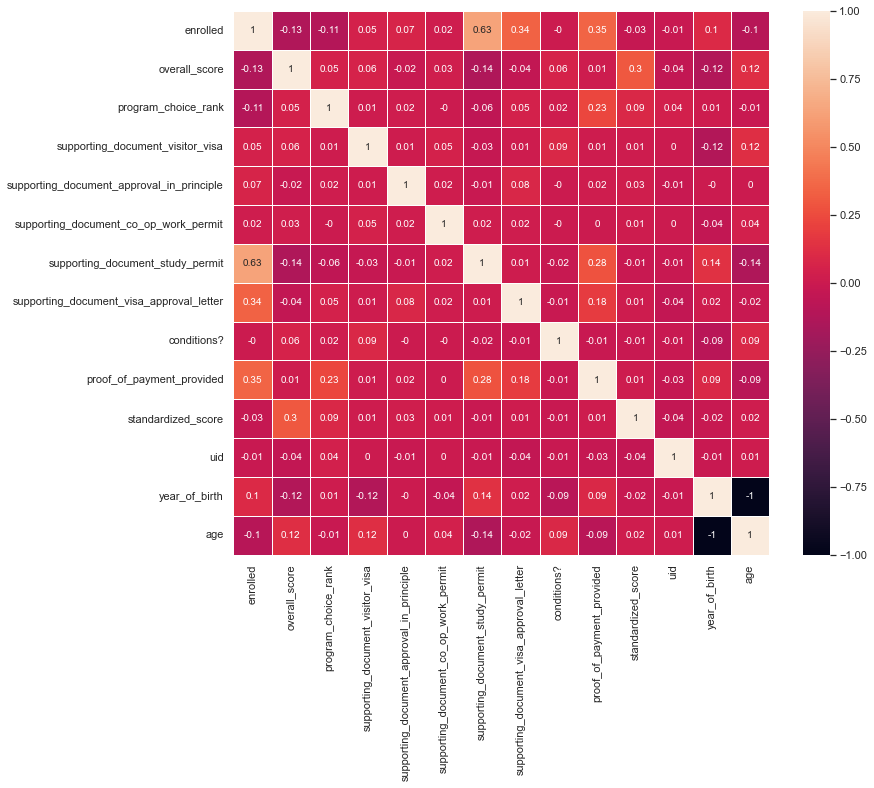

In [276]:
fig, ax = plt.subplots(figsize=(12,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, annot=True, linewidths=.5, ax=ax)

In [277]:
df_select = st[['enrolled',
                  'supporting_document_study_permit',
                  'supporting_document_visa_approval_letter',
                  'proof_of_payment_provided']]

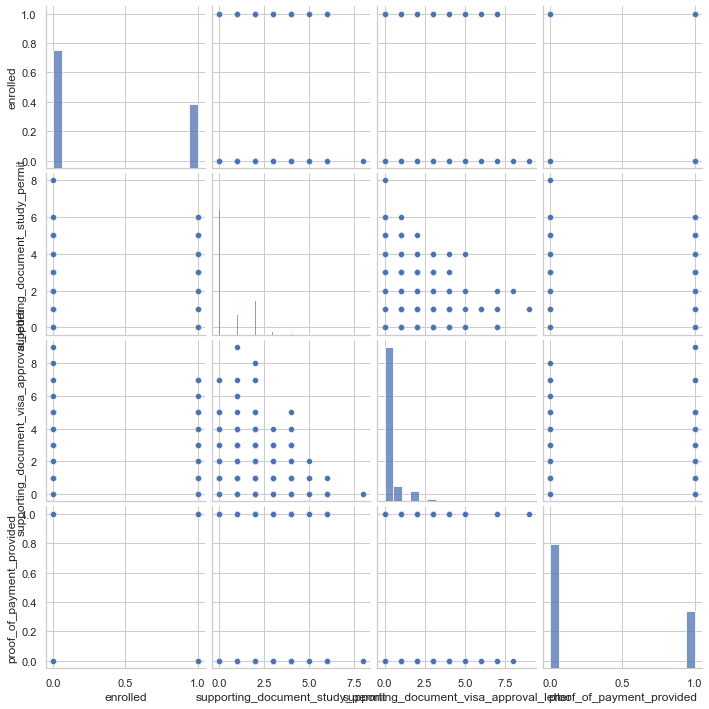

In [278]:
sns.pairplot(df_select, palette='hls')

### Plot  How many Indian students among enrolled students?

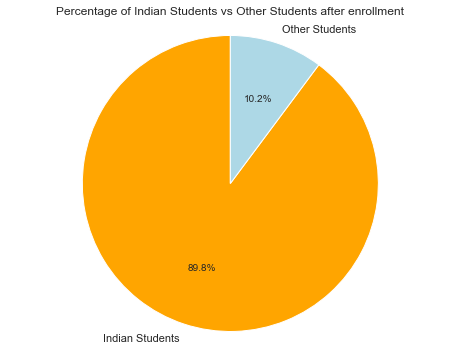

In [279]:
enrolled_students = st[st['enrolled'] == 1]
# Count the occurrences of each citizenship
citizenship_counts = enrolled_students['primary_citizenship'].value_counts()

# Plotting a pie chart
labels = ['Indian Students', 'Other Students']
sizes = [citizenship_counts.get('India', 0), citizenship_counts.sum() - citizenship_counts.get('India', 0)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of Indian Students vs Other Students after enrollment')
plt.show()

In [280]:
st.primary_citizenship.value_counts().head(11)

India          28457
Nigeria          952
Bangladesh       631
Jordan           587
China            482
Pakistan         205
Ghana            188
Gambia           141
Nepal            137
Philippines      135
Colombia         124
Name: primary_citizenship, dtype: int64

### Plot Enrolled rate among top 11 countries

In [281]:
st_11 = st.primary_citizenship.value_counts().head(11).index
st_pri = st[st['primary_citizenship'].isin(st_11)]

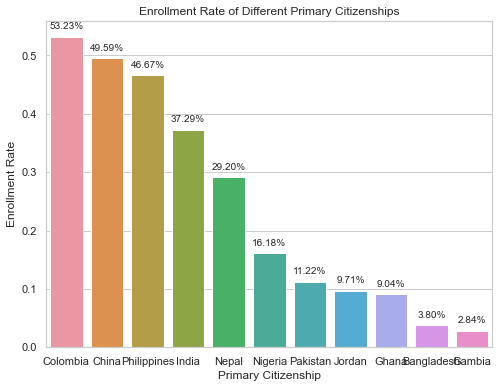

In [282]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'st_pri' is your DataFrame
# You may need to install seaborn and matplotlib if not already installed: pip install seaborn matplotlib

# Calculate enrollment rates for each primary_citizenship and sort by the mean values in descending order
enrollment_rates = st_pri.groupby('primary_citizenship')['enrolled'].mean().sort_values(ascending=False).reset_index()

# Plotting using Seaborn
ax = sns.barplot(x='primary_citizenship', y='enrolled', data=enrollment_rates)
plt.title('Enrollment Rate of Different Primary Citizenships')
plt.xlabel('Primary Citizenship')
plt.ylabel('Enrollment Rate')

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


### Plot 1 Age VS standardized_score

<AxesSubplot:xlabel='age', ylabel='standardized_score'>

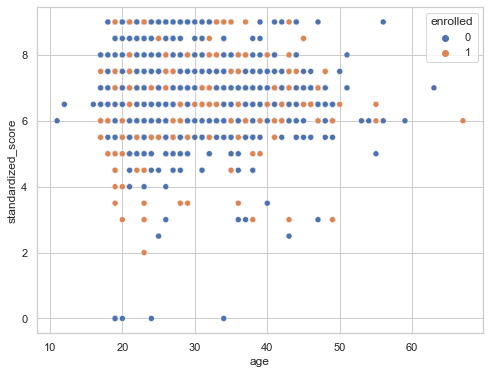

In [283]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=st, x="age", y="standardized_score", hue="enrolled")

### Plot 2 Year of birth VS enrolled

<AxesSubplot:xlabel='year_of_birth', ylabel='Count'>

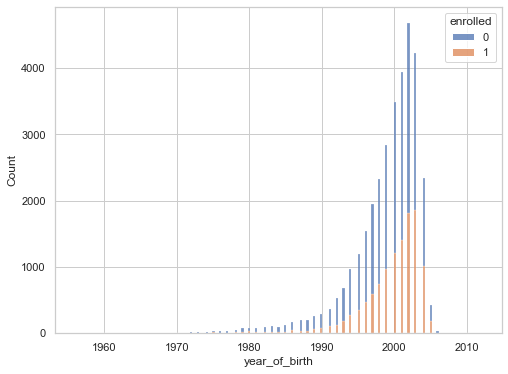

In [284]:
sns.histplot(data=st, x="year_of_birth", hue="enrolled", multiple="stack")

### Plot 3 Supporting document study permit VS enrolled

<AxesSubplot:xlabel='supporting_document_study_permit', ylabel='enrolled'>

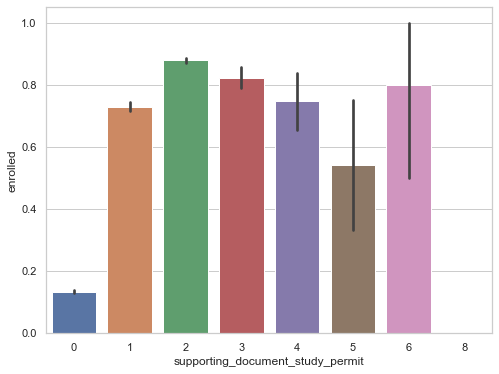

In [285]:
plt.figure(figsize=(8,6))
sns.barplot(x=st.supporting_document_study_permit,y=st.enrolled)

### Plot 4 Agency name VS enrolled rate

In [286]:
top_agencies = st.agency_name.value_counts().head(20).index
top_agencies

Index(['Jain Overseas Acumen', 'Applyboard (Easy Education Inc.)',
       'IDP - India', 'Jain Overseas', 'Kanan International Pvt Ltd',
       'GEEBEE Education Pvt Ltd', 'Gocool',
       'Landmark Immigration Consultants Pvt Ltd', 'Santa Monica',
       'Global Opportunities', 'Canam Consultants Limited',
       'Nahleh Educational Consultations',
       'Charms Education and Immigration Services', 'CanEd Consultants',
       'Angel Edunext', 'Ace Acumen Academy', 'Future Link',
       'Kunming Sino-Canadian Education Information Consultancy Ltd. Co. (KSCEIC)',
       'Rao Corporate Services', 'Pioneer Immigration'],
      dtype='object')

In [287]:
top_agencies_df = st[st['agency_name'].isin(top_agencies)]

In [288]:
enrolled_counts = top_agencies_df.groupby(['agency_name', 'enrolled']).size().unstack().fillna(0)
enrollment_rate = enrolled_counts.div(top_agencies_df.groupby('agency_name').size(), axis=0) * 100

In [289]:
df = pd.DataFrame(enrollment_rate.reset_index())
df.columns = ['agency_name','not_enrolled','enrolled_rate']

In [290]:
# Set the agency_name column as the index for plotting
df.set_index('agency_name', inplace=True)

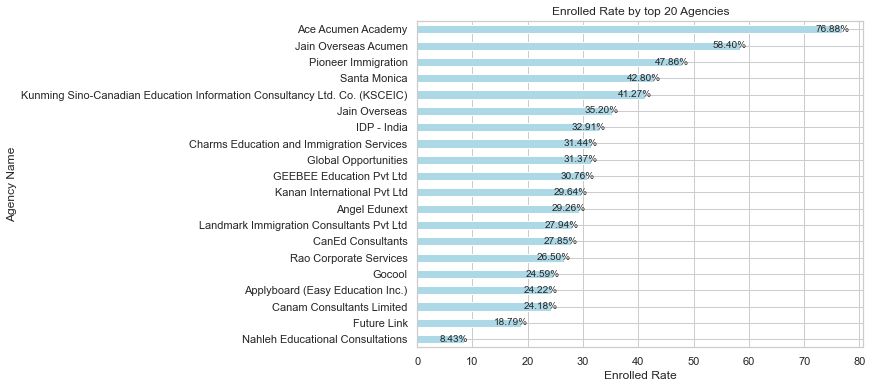

In [291]:
ax = df['enrolled_rate'].sort_values().plot.barh(color='lightblue')
# Display the percentage numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(-10, 0), textcoords='offset points')
plt.xlabel('Enrolled Rate')
plt.ylabel('Agency Name')
plt.title('Enrolled Rate by top 20 Agencies')
plt.show()

### Plot 5 Agency name (exclude Indian agency) VS enrolled rate

In [292]:
top_agencies = agency_counts_outside_india.head(20).index

In [293]:
top_agencies_df = st[st['agency_name'].isin(top_agencies)]

In [294]:
enrolled_counts = top_agencies_df.groupby(['agency_name', 'enrolled']).size().unstack().fillna(0)
enrollment_rate = enrolled_counts.div(top_agencies_df.groupby('agency_name').size(), axis=0) * 100

In [295]:
df = pd.DataFrame(enrollment_rate.reset_index())
df.columns = ['agency_name','not_enrolled','enrolled_rate']

In [296]:
# Set the agency_name column as the index for plotting
df.set_index('agency_name', inplace=True)

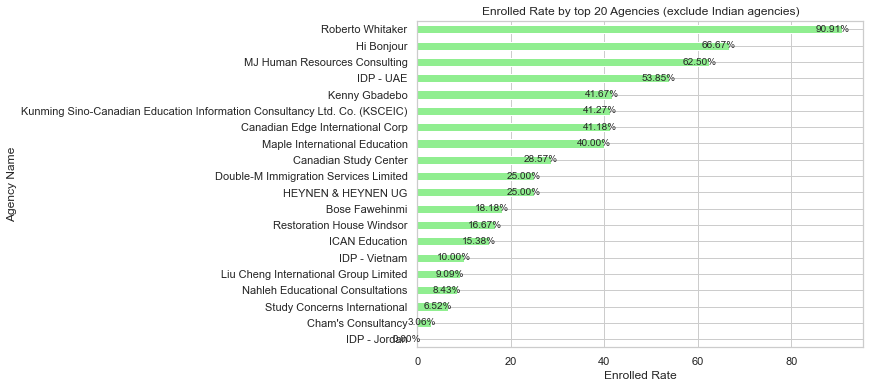

In [297]:
ax = df['enrolled_rate'].sort_values().plot.barh(color='lightgreen')
# Display the percentage numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(-10, 0), textcoords='offset points')
plt.xlabel('Enrolled Rate')
plt.ylabel('Agency Name')
plt.title('Enrolled Rate by top 20 Agencies (exclude Indian agencies)')
plt.show()

### Plot 6 Program term VS enrolled

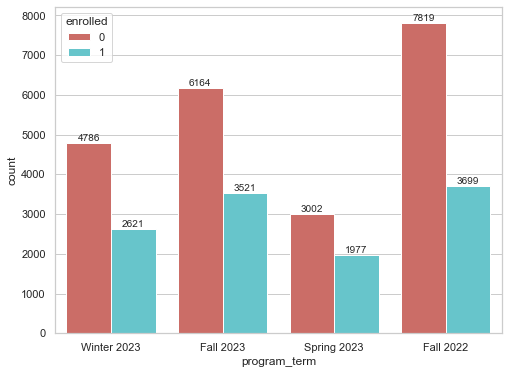

In [298]:
ax = sns.countplot(data=st, x='program_term', hue='enrolled', palette='hls')
for container in ax.containers:
    ax.bar_label(container)

### Plot 7 Enrolled rate VS Applicant type

In [299]:
pd.crosstab(st.enrolled,st.applicant_type)

applicant_type,Agent-Managed,Direct Applicant,Institution-Managed
enrolled,,,
0,18841,2828,102
1,11136,549,133


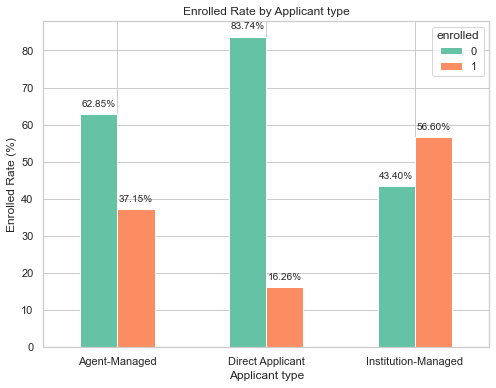

In [300]:
# Calculate churn percentages by gender
st_counts = st.groupby(['applicant_type', 'enrolled']).size().unstack().fillna(0)
st_percentage = st_counts.div(st.groupby('applicant_type').size(), axis=0) * 100

# Create a bar plot to show the percentage of churn by gender
ax = st_percentage.plot(kind='bar', color=sns.color_palette("Set2"))

# Adding labels and a title
plt.xlabel('Applicant type')
plt.ylabel('Enrolled Rate (%)')
plt.title('Enrolled Rate by Applicant type')

# Display the percentage numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='center')

# Display the plot
plt.show()

<AxesSubplot:xlabel='applicant_type', ylabel='enrolled'>

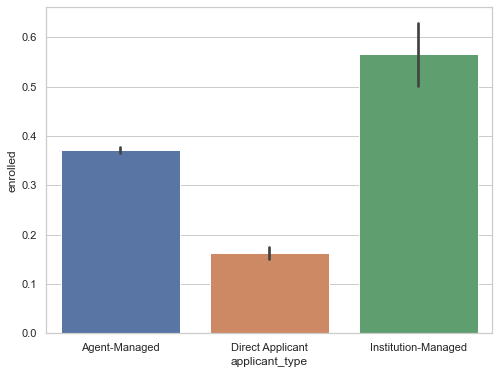

In [301]:
plt.figure(figsize=(8,6))
sns.barplot(x=st.applicant_type,y=st.enrolled)

### Plot 8 Offer state VS Age

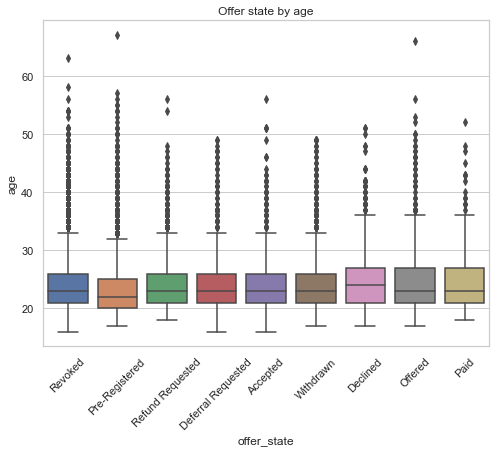

In [302]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='offer_state', y='age', data=st)
plt.title('Offer state by age')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Plot 9 Application state VS Enrolled

<AxesSubplot:xlabel='application_state', ylabel='enrolled'>

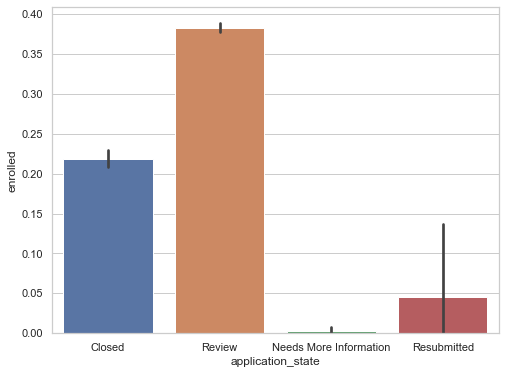

In [303]:
plt.figure(figsize=(8,6))
sns.barplot(x=st.application_state,y=st.enrolled)

### Plot 10 Application submitted date VS enrolled

In [304]:
st['app_sub_date'] = st['application_submitted_date'].dt.date

In [305]:
df_5 = st[['app_sub_date']][st['enrolled'] == True].sort_values(by='app_sub_date')

<Figure size 864x576 with 0 Axes>

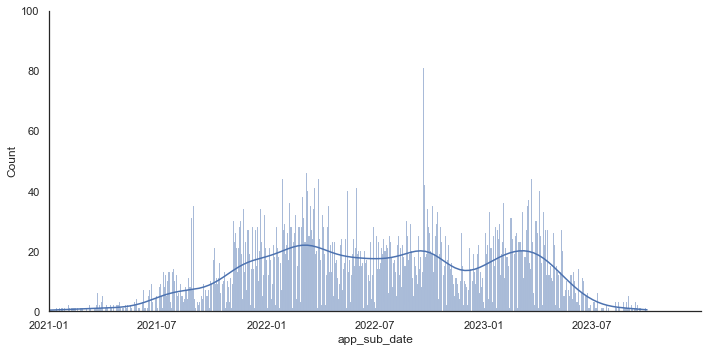

In [306]:
# Set the figure size and aspect ratio
plt.figure(figsize=(12,8))
sns.set(style='white')
plot = sns.displot(data=df_5, x="app_sub_date", kde=True, aspect=2)  # Adjust the aspect ratio as needed

# Adjust x-axis label rotation for better readability
plot.set_xticklabels(rotation=0)

plt.xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2023-12-31'))
plt.ylim(0, 100)
# Show the plot
plt.show()

### Plot 11 Program title VS Enrolled rate

In [307]:
program_col= st.program_title.value_counts().head(20).index
program_col

Index(['Computer Systems Technician-Networking',
       'International Business Management - Logistics System', 'Business',
       'Data Analytics for Business', 'Business (Acumen)',
       'Hospitality - Hotel And Restaurant',
       'Office Administration - Health Services (Acumen)',
       'International Business Management - Logistics System (Acumen)',
       'Social Service Worker - Gerontology (Acumen)',
       'Computer Systems Technician-Networking (Acumen)', 'Event Management',
       'English for Academic Purposes', 'Social Service Worker - Gerontology',
       'Human Resources Management', 'Strategic Project Management',
       'Web Development and Internet Applications',
       'Human Resource Management (Acumen)', 'Culinary Management',
       'Business - Chatham', 'Construction Engineering Technician'],
      dtype='object')

In [308]:
program_20_df = st[st['program_title'].isin(program_col)]

In [309]:
enrolled_counts = program_20_df.groupby(['program_title', 'enrolled']).size().unstack().fillna(0)
enrollment_rate = enrolled_counts.div(program_20_df.groupby('program_title').size(), axis=0) * 100

In [310]:
df = pd.DataFrame(enrollment_rate.reset_index())
df.columns = ['program_title','not_enrolled','enrolled_rate']

In [311]:
# Set the agency_name column as the index for plotting
df.set_index('program_title', inplace=True)

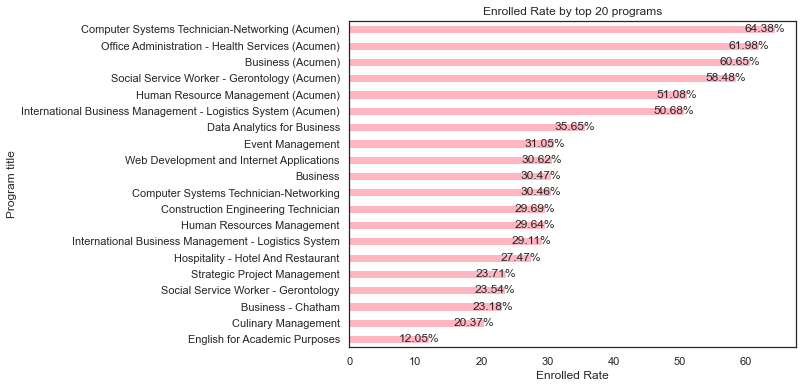

In [312]:
ax = df['enrolled_rate'].sort_values().plot.barh(color='lightpink')
# Display the percentage numbers on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}%', (p.get_width(), p.get_y() + p.get_height() / 2.), ha='center', va='center', xytext=(-10, 0), textcoords='offset points')
plt.xlabel('Enrolled Rate')
plt.ylabel('Program title')
plt.title('Enrolled Rate by top 20 programs')
plt.show()

### Plot 12 Campus name VS enrolled

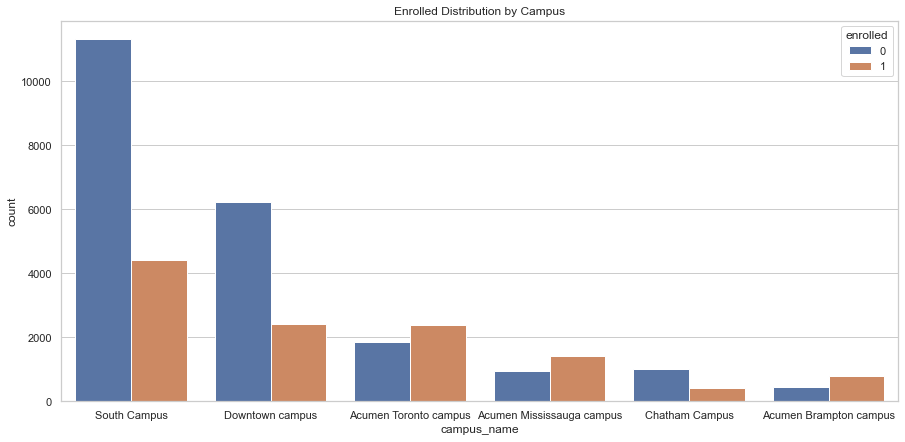

In [313]:
order = st['campus_name'].value_counts().index
# Set the style of seaborn
sns.set(style="whitegrid")

# Create separate bar plots for each airline
plt.figure(figsize=(15, 7))
sns.countplot(x='campus_name', hue='enrolled', data=st, order=order)
plt.title('Enrolled Distribution by Campus')
plt.show()

<AxesSubplot:xlabel='campus_name', ylabel='enrolled'>

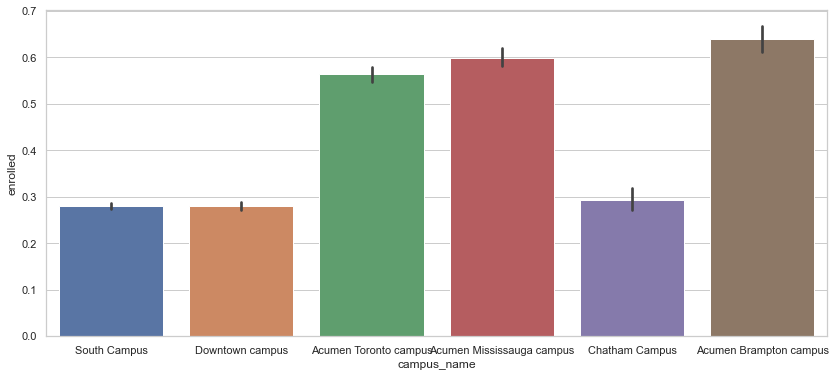

In [314]:
order = st.campus_name.value_counts().index
plt.figure(figsize=(14,6))
sns.barplot(x=st.campus_name,y=st.enrolled,order=order)

## Temporal variables analysis

### application_submitted_date VS screened_date

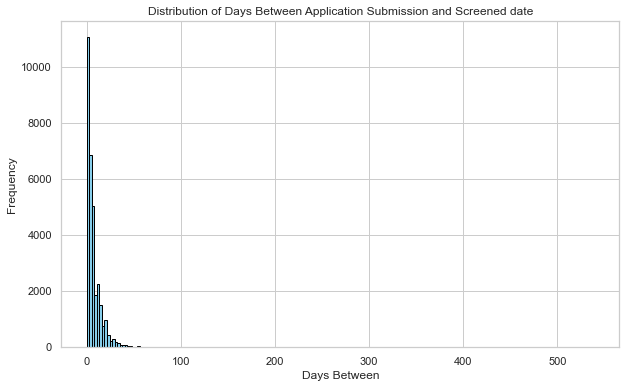

In [315]:
# Calculate the days between the two dates and create a new column
st['days_between_1'] = (st['screened_date'] - st['application_submitted_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_1'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Screened date')
#plt.xlim(0,100)
plt.xlabel('Days Between')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### offer_date VS issued_date

In [316]:
are_columns_equal = st['offer_date'].equals(st['issued_date'])
are_columns_equal

False

In [317]:
different_dates_mask = st['offer_date'] != st['issued_date']

# Filter the DataFrame based on the boolean mask
rows_with_different_dates = st[different_dates_mask]

# Print or use the 'rows_with_different_dates' DataFrame as needed
print("Rows with different dates:")
print(rows_with_different_dates[['offer_date','issued_date']])

Rows with different dates:
                   offer_date             issued_date
7     2022-10-02 19:38:02.692 2022-10-05 16:52:31.762
14    2022-10-02 19:34:29.474 2022-10-05 16:34:15.713
16    2022-10-02 19:38:20.839 2022-10-05 16:34:53.199
31    2022-10-02 19:44:05.748 2022-10-05 16:53:03.577
54    2023-01-25 09:54:57.192 2023-01-26 09:16:21.676
...                       ...                     ...
33542                     NaT                     NaT
33547                     NaT                     NaT
33549                     NaT                     NaT
33565                     NaT                     NaT
33573 2022-05-30 18:00:13.699 2022-06-08 12:15:37.131

[4039 rows x 2 columns]


### application_submitted_date VS offer_date

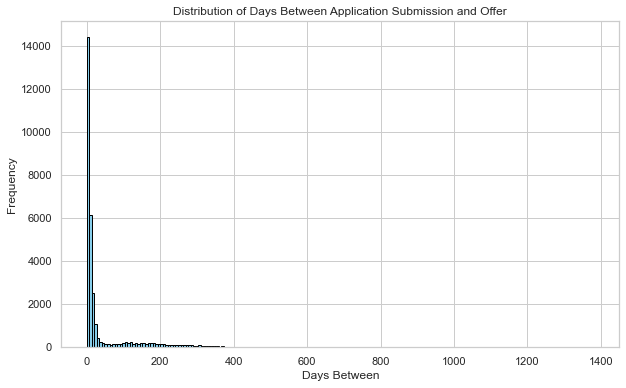

In [318]:
# Calculate the days between the two dates and create a new column
st['days_between_2'] = (st['offer_date'] - st['application_submitted_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_2'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Offer')
#plt.xlim(0,400)
plt.xlabel('Days Between')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### application_submitted_date VS issued_date

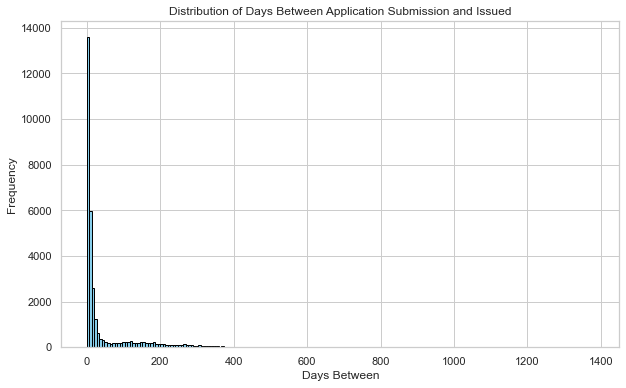

In [319]:
# Calculate the days between the two dates and create a new column
st['days_between_3'] = (st['issued_date'] - st['application_submitted_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_3'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Issued')
#plt.xlim(0,400)
plt.xlabel('Days Between')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### application_submitted_date VS expiration_date

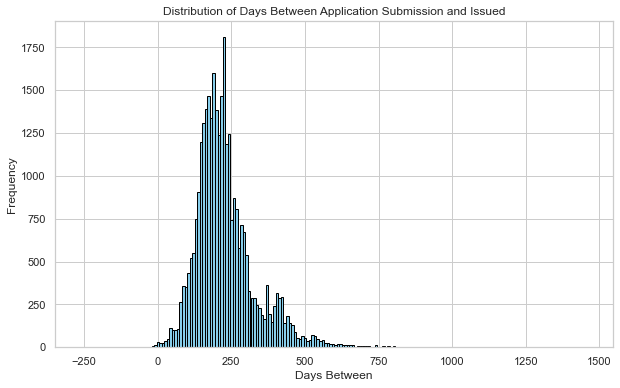

In [320]:
# Calculate the days between the two dates and create a new column
st['days_between_4'] = (st['expiration_date'] - st['application_submitted_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_4'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Issued')
#plt.xlim(0,1000)
plt.xlabel('Days Between')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### offer_date VS proof_of_payment_date

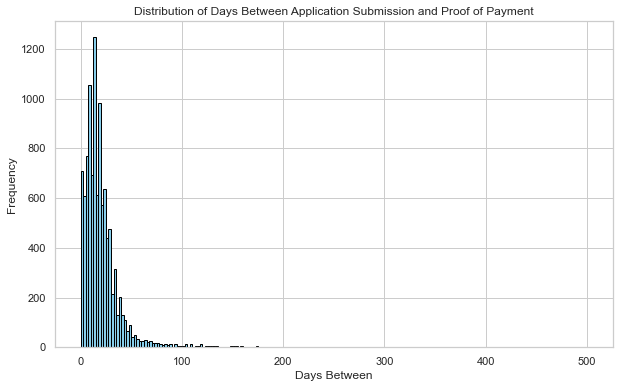

In [321]:
st['days_between_5'] = (st['proof_of_payment_date'] - st['offer_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_5'], bins=200, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,400)
plt.grid(True)
plt.show()

### offer_date VS offer_accepted_date

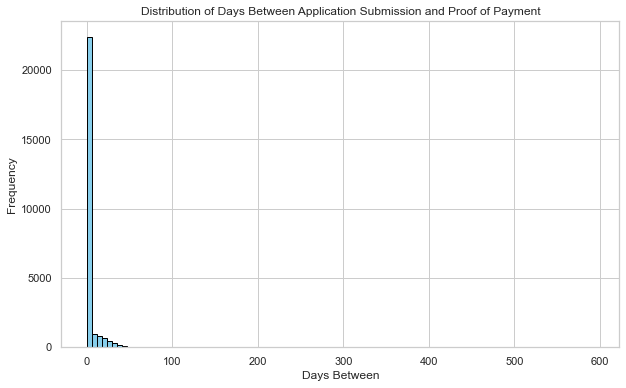

In [322]:
st['days_between_6'] = (st['offer_accepted_date'] - st['offer_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_6'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,60)
plt.grid(True)
plt.show()

### application_submitted_date VS application_last_modified_date

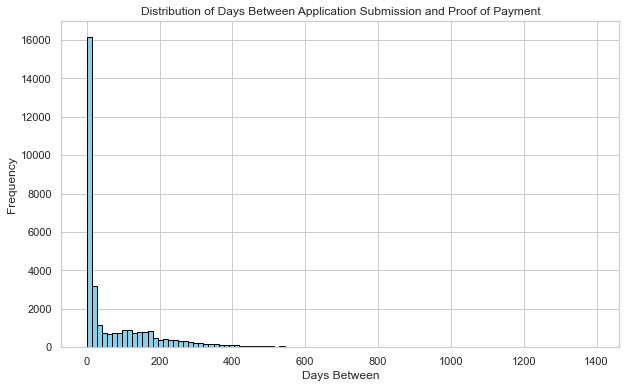

In [323]:
st['days_between_7'] = (st['application_last_modified_date'] - st['application_submitted_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_7'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,60)
plt.grid(True)
plt.show()

### screened_date VS offer_date

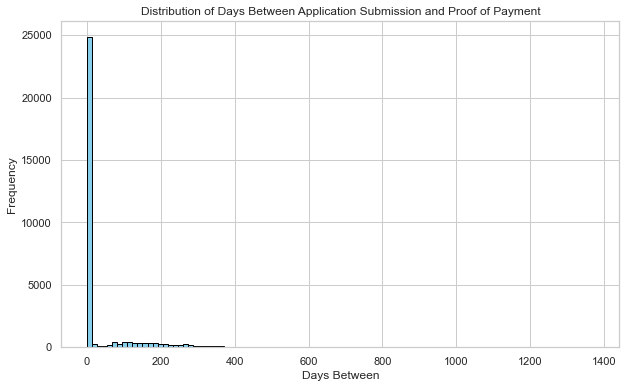

In [324]:
st['days_between_8'] = (st['offer_date'] - st['screened_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_8'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,60)
plt.grid(True)
plt.show()

### offer_date VS expiration_date

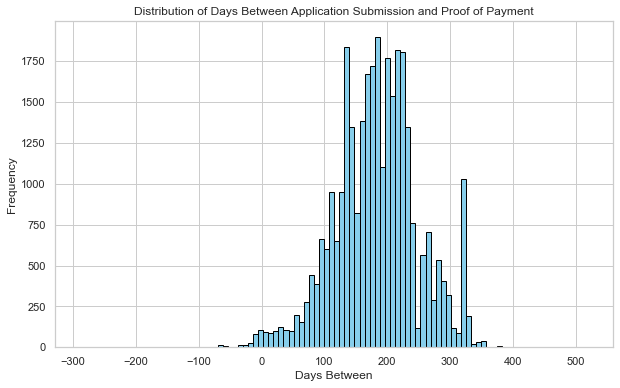

In [325]:
st['days_between_9'] = (st['expiration_date'] - st['offer_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_9'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,60)
plt.grid(True)
plt.show()

### offer_date VS paid_date

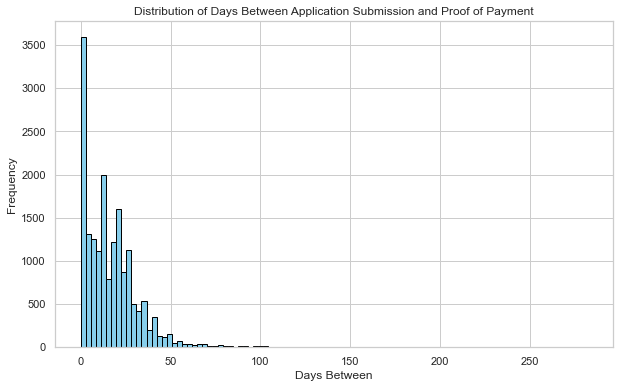

In [326]:
st['days_between_10'] = (st['paid_date'] - st['offer_date']).dt.days

# Plot a histogram to illustrate the distribution of days
plt.figure(figsize=(10, 6))
plt.hist(st['days_between_10'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Days Between Application Submission and Proof of Payment')
plt.xlabel('Days Between')
plt.ylabel('Frequency')
#plt.xlim(0,60)
plt.grid(True)
plt.show()

In [327]:
st.shape

(33589, 71)

In [328]:
st.columns

Index(['enrolled', 'applicant_number', 'mailing_address_postal_zip_code',
       'primary_citizenship', 'mother_tongue', 'country_of_birth',
       'date_of_birth', 'status_in_canada', 'current_country_of_residence',
       'current_province_of_residence', 'english_proficiency_type',
       'overall_score', 'test_type', 'applicant_type', 'declared_student_id',
       'profile_last_modified_date', 'agency_name', 'application_number',
       'application_state', 'program_selection_added_date',
       'program_choice_rank', 'program_title', 'program_code', 'campus_name',
       'program_term', 'program_start_date',
       'supporting_document_visitor_visa',
       'supporting_document_approval_in_principle',
       'supporting_document_co_op_work_permit',
       'supporting_document_study_permit',
       'supporting_document_visa_approval_letter',
       'application_submitted_date', 'application_resubmitted_date',
       'screening_status', 'screened_date', 'application_last_modified_dat

In [329]:
days = st[['days_between_1', 'days_between_2', 'days_between_3',
       'days_between_4', 'days_between_5', 'days_between_6', 'days_between_7',
       'days_between_8', 'days_between_9', 'days_between_10']]

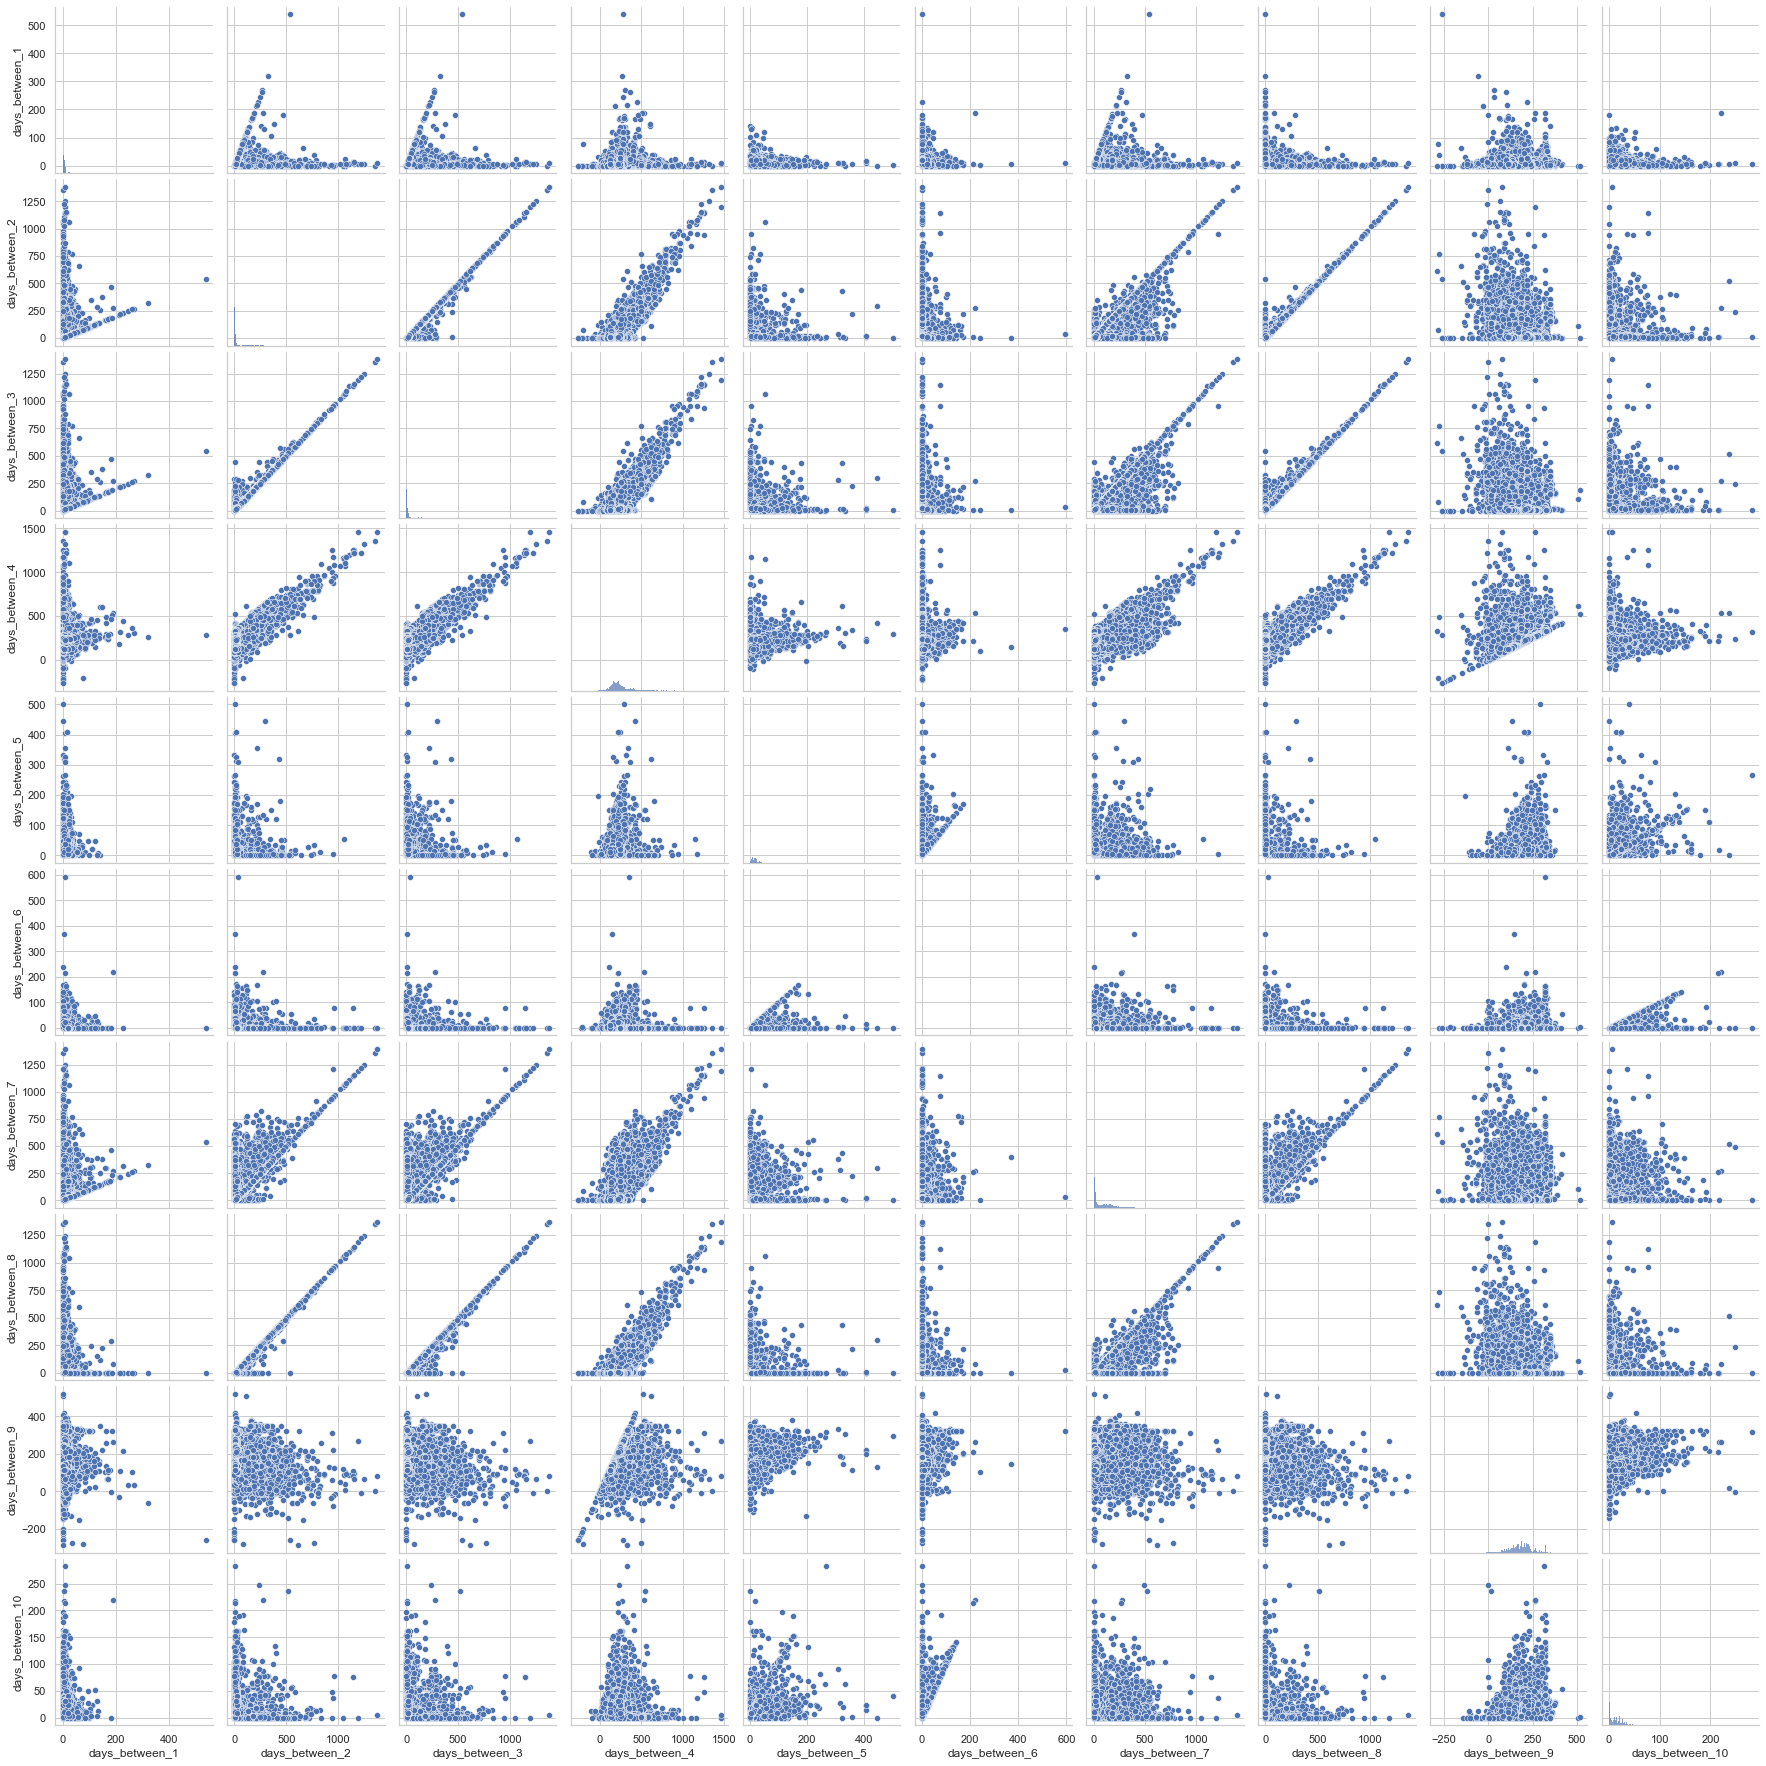

In [330]:
sns.pairplot(days, palette='hls')